# Прогнозирование продаж в магазинах офлаин-ритейлера в США <a class="tocSkip">

In [1]:
!pip uninstall numpy pmdarima sktime -y
!pip install "numpy<2" "pmdarima>=2.0.3" "sktime>=0.21.0" --force-reinstall
!pip install sktime
!pip install statsforecast

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.0/37.0 MB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 14.6 MB/s eta 0:00:00


In [ ]:
from Processor import *
from Analyser import *
from Forecaster import *

In [23]:
import os
#!cd .. && cp -r input/shop-data . && mv shop-data/* working
#основные данные
PATH = ""
sales = pd.read_csv(os.path.join(PATH, 'shop_sales.csv'))
#данные о датах и праздниках (соединяется с продажами по полю date_id)
calendar = pd.read_csv(os.path.join(PATH, 'shop_sales_dates.csv'))
#данные о датах и праздниках (соединяется с датами по полю wm_yr_wk)
prices = pd.read_csv(os.path.join(PATH, 'shop_sales_prices.csv'))

In [24]:
store = sales.loc[sales['store_id'] == 'STORE_1'].reset_index()
del store['index']

In [25]:
store.head()

item_id store_id  date_id  cnt
0  STORE_1_064  STORE_1        1    0
1  STORE_1_064  STORE_1        2    1
2  STORE_1_064  STORE_1        3    0
3  STORE_1_064  STORE_1        4    0
4  STORE_1_064  STORE_1        5    0

Графики продаж артикулов по магазинам:

Text(0.5, 0.98, 'STORE_1')

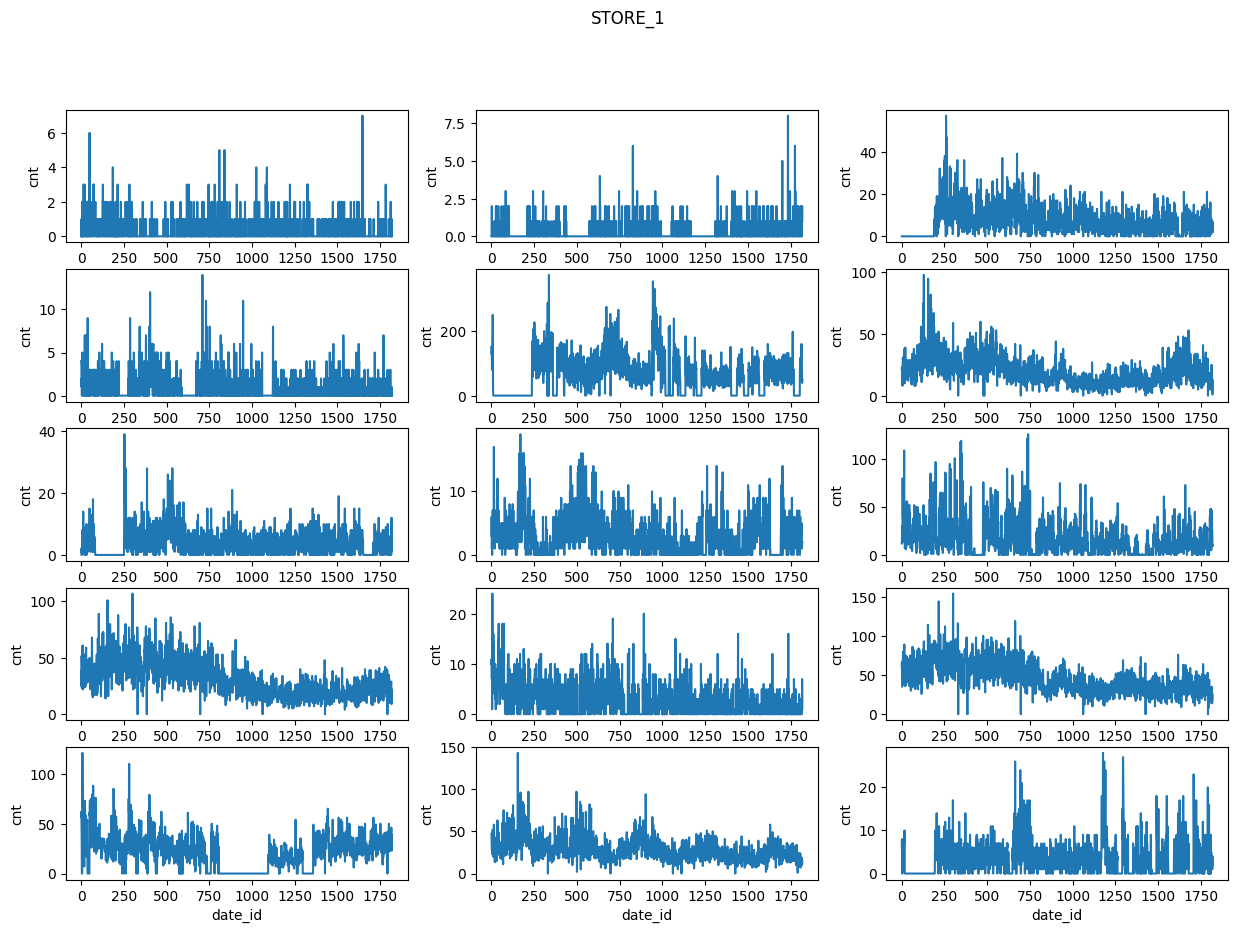

In [26]:
fig,ax = plt.subplots(5,3,figsize=(15,10))

for i, art in enumerate(sales[sales.store_id=='STORE_1'].item_id.unique()):
    sns.lineplot(data = sales[(sales.item_id==art) & (sales.store_id=='STORE_1')],
                 x='date_id',y='cnt',ax = ax[i//3][i%3])
plt.suptitle("STORE_1")

In [27]:
model = TimeSeriesClass(store, calendar, prices)

Product  STORE_1_064
{'trend': {'exists': True, 'p_value': 3.926018811104344e-05, 'slope': -0.00012481635286026773}, 'seasonality': {'exists': False, 'period': 30, 'amplitude': 0.361045197740113}, 'stationarity': {'ADF': {'p_value': 2.7302921783155166e-22, 'stationary': True}, 'KPSS': {'p_value': 0.01, 'stationary': False}}, 'outliers': {'count': 25, 'indices': [Timestamp('2011-02-12 00:00:00'), Timestamp('2011-02-19 00:00:00'), Timestamp('2011-03-19 00:00:00'), Timestamp('2011-04-11 00:00:00'), Timestamp('2011-04-13 00:00:00'), Timestamp('2011-06-05 00:00:00'), Timestamp('2011-08-02 00:00:00'), Timestamp('2011-08-30 00:00:00'), Timestamp('2011-11-07 00:00:00'), Timestamp('2012-10-08 00:00:00'), Timestamp('2012-10-20 00:00:00'), Timestamp('2013-02-12 00:00:00'), Timestamp('2013-03-20 00:00:00'), Timestamp('2013-04-16 00:00:00'), Timestamp('2013-05-16 00:00:00'), Timestamp('2013-07-27 00:00:00'), Timestamp('2013-11-18 00:00:00'), Timestamp('2014-01-12 00:00:00'), Timestamp('2014-01-19 0

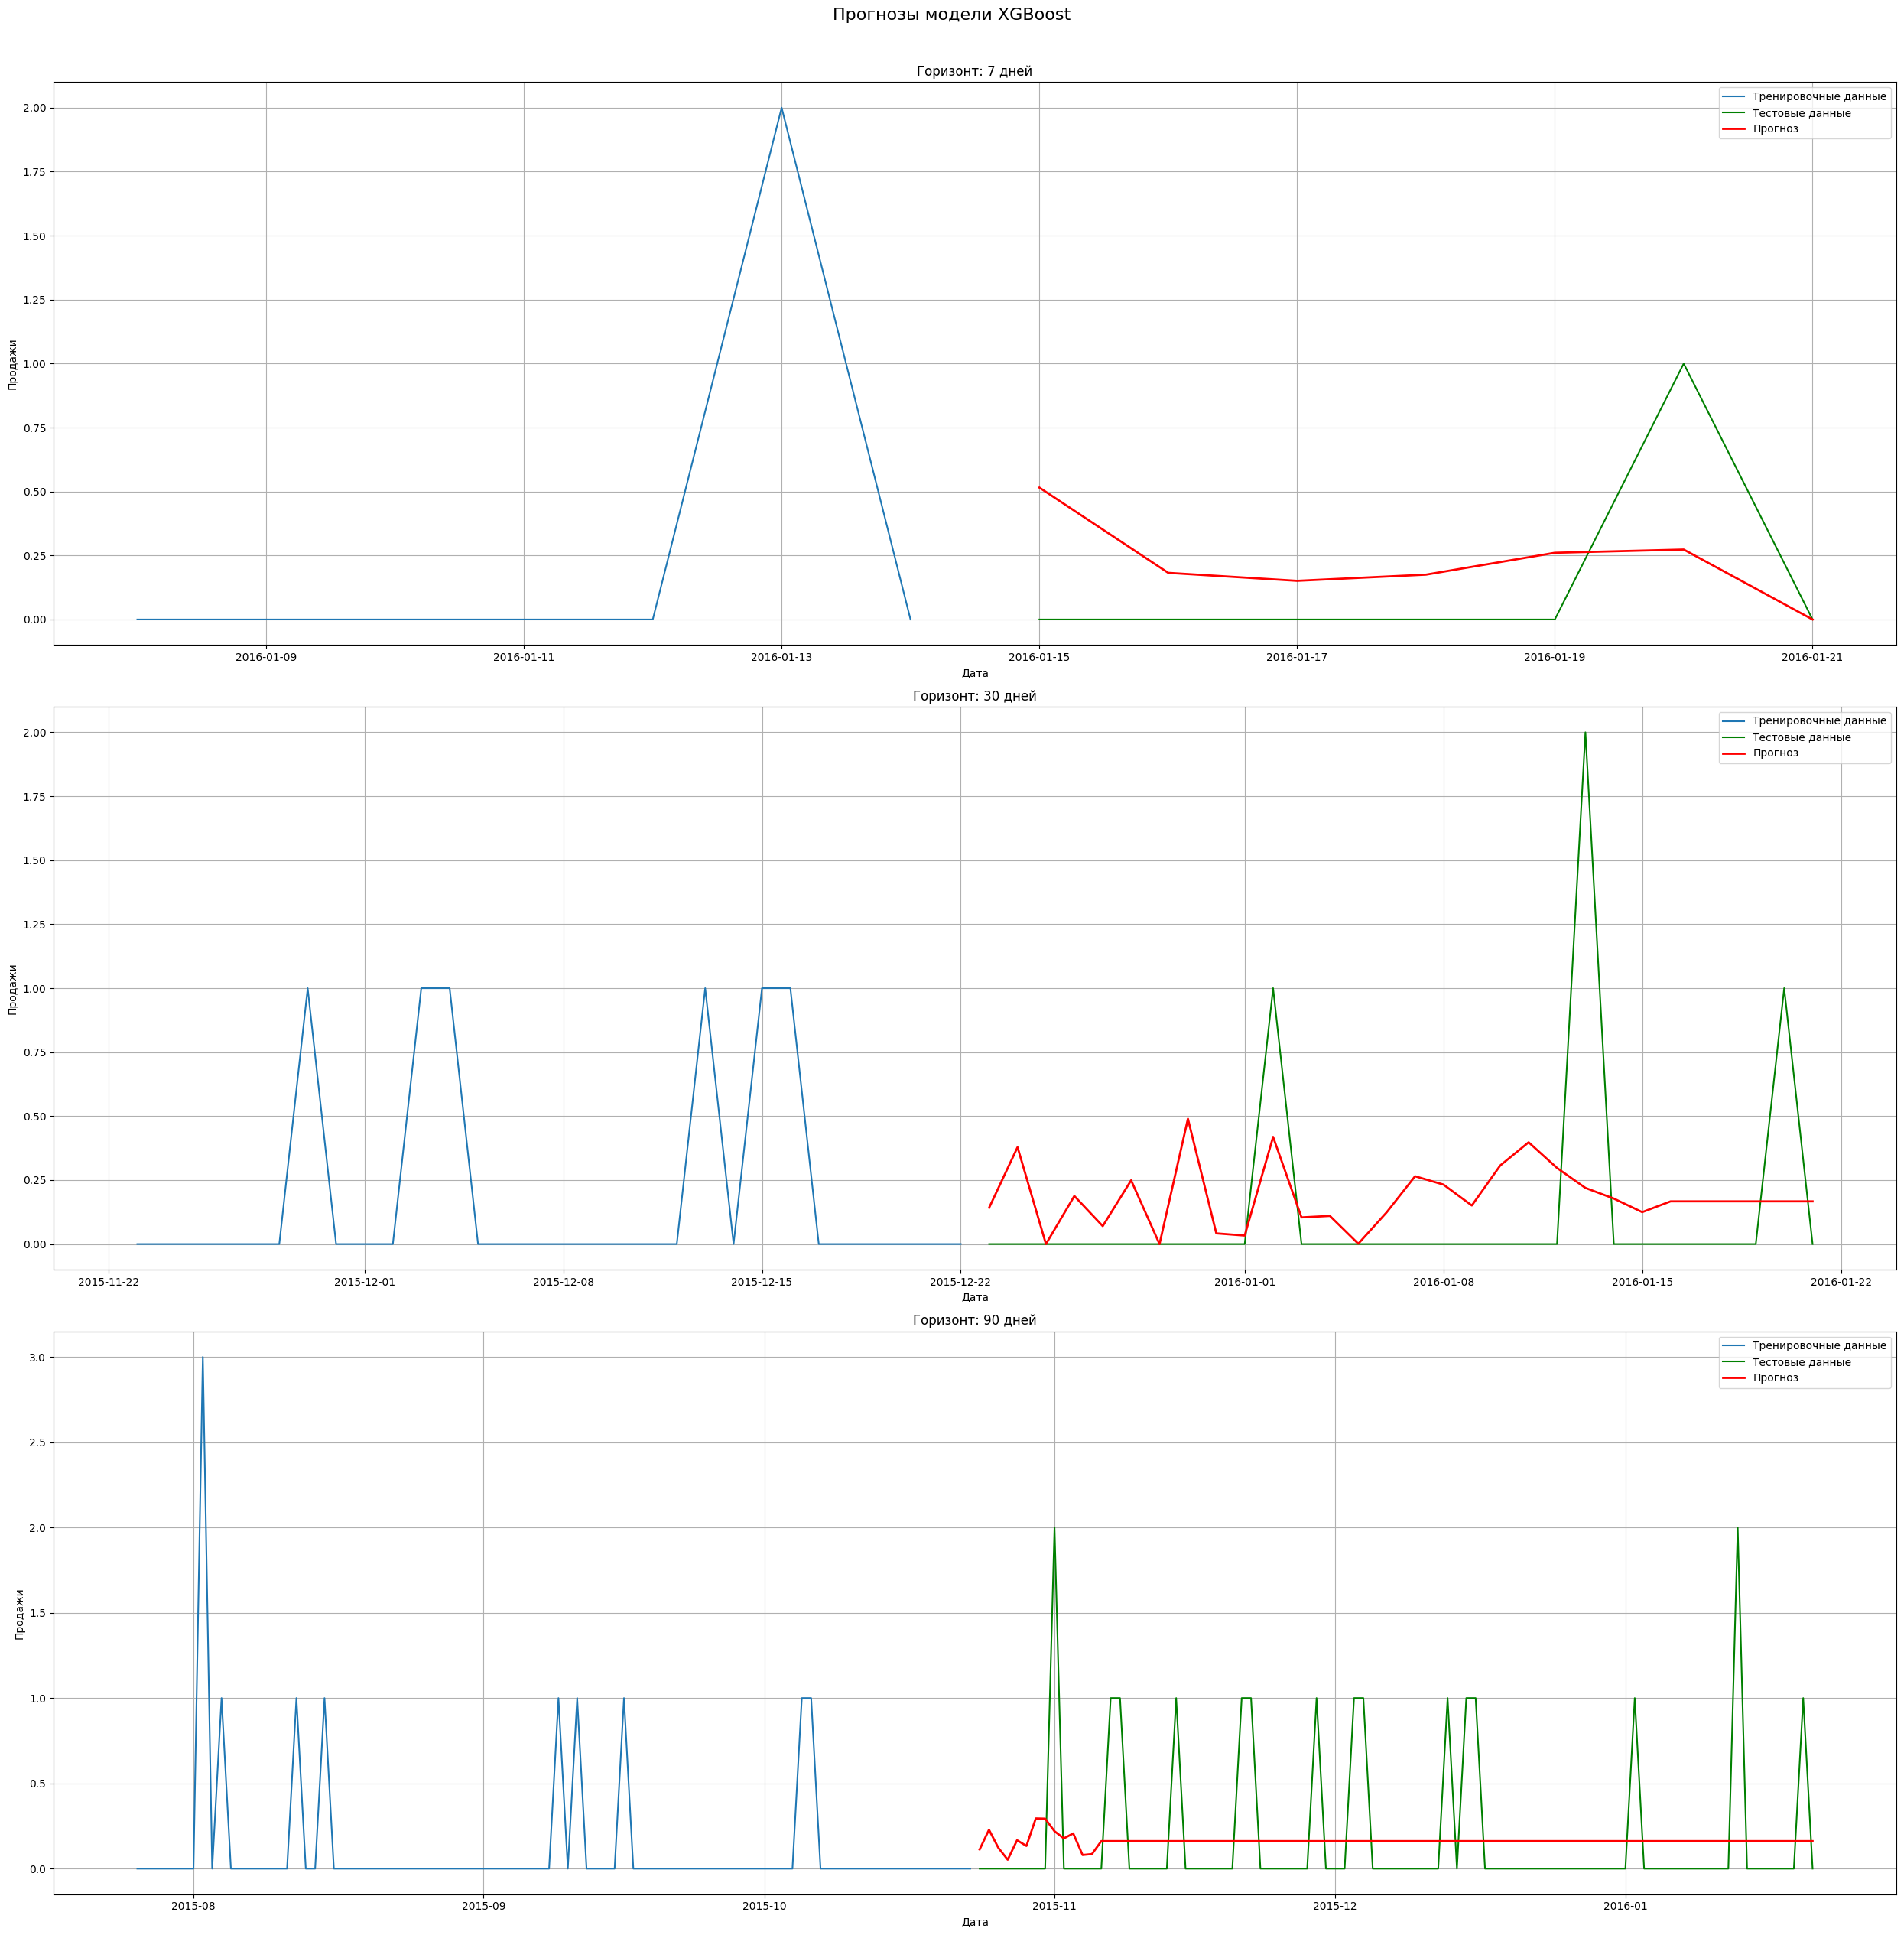

{('XGBoost', 7): {'MAE': 0.9204392433166504,
                  'MAPE (%)': 79.70916969435555,
                  'RMSE': 0.9880980479790505,
                  'SMAPE': 137.08522295127025},
 ('XGBoost', 30): {'MAE': 0.9492158770561219,
                   'MAPE (%)': 83.05183642440372,
                   'RMSE': 1.0388465795797788,
                   'SMAPE': 145.32357019793204},
 ('XGBoost', 90): {'MAE': 1.026531665854984,
                   'MAPE (%)': 85.21324104732938,
                   'RMSE': 1.1180241447018682,
                   'SMAPE': 148.9390489996456}}
Product  STORE_1_065
{'trend': {'exists': True, 'p_value': 7.132746734725179e-05, 'slope': 0.00011521616853672875}, 'seasonality': {'exists': False, 'period': 30, 'amplitude': 0.29280131826741995}, 'stationarity': {'ADF': {'p_value': 1.6437968035298353e-11, 'stationary': True}, 'KPSS': {'p_value': 0.01, 'stationary': False}}, 'outliers': {'count': 18, 'indices': [Timestamp('2011-04-22 00:00:00'), Timestamp('2011-09-29 00:00:00

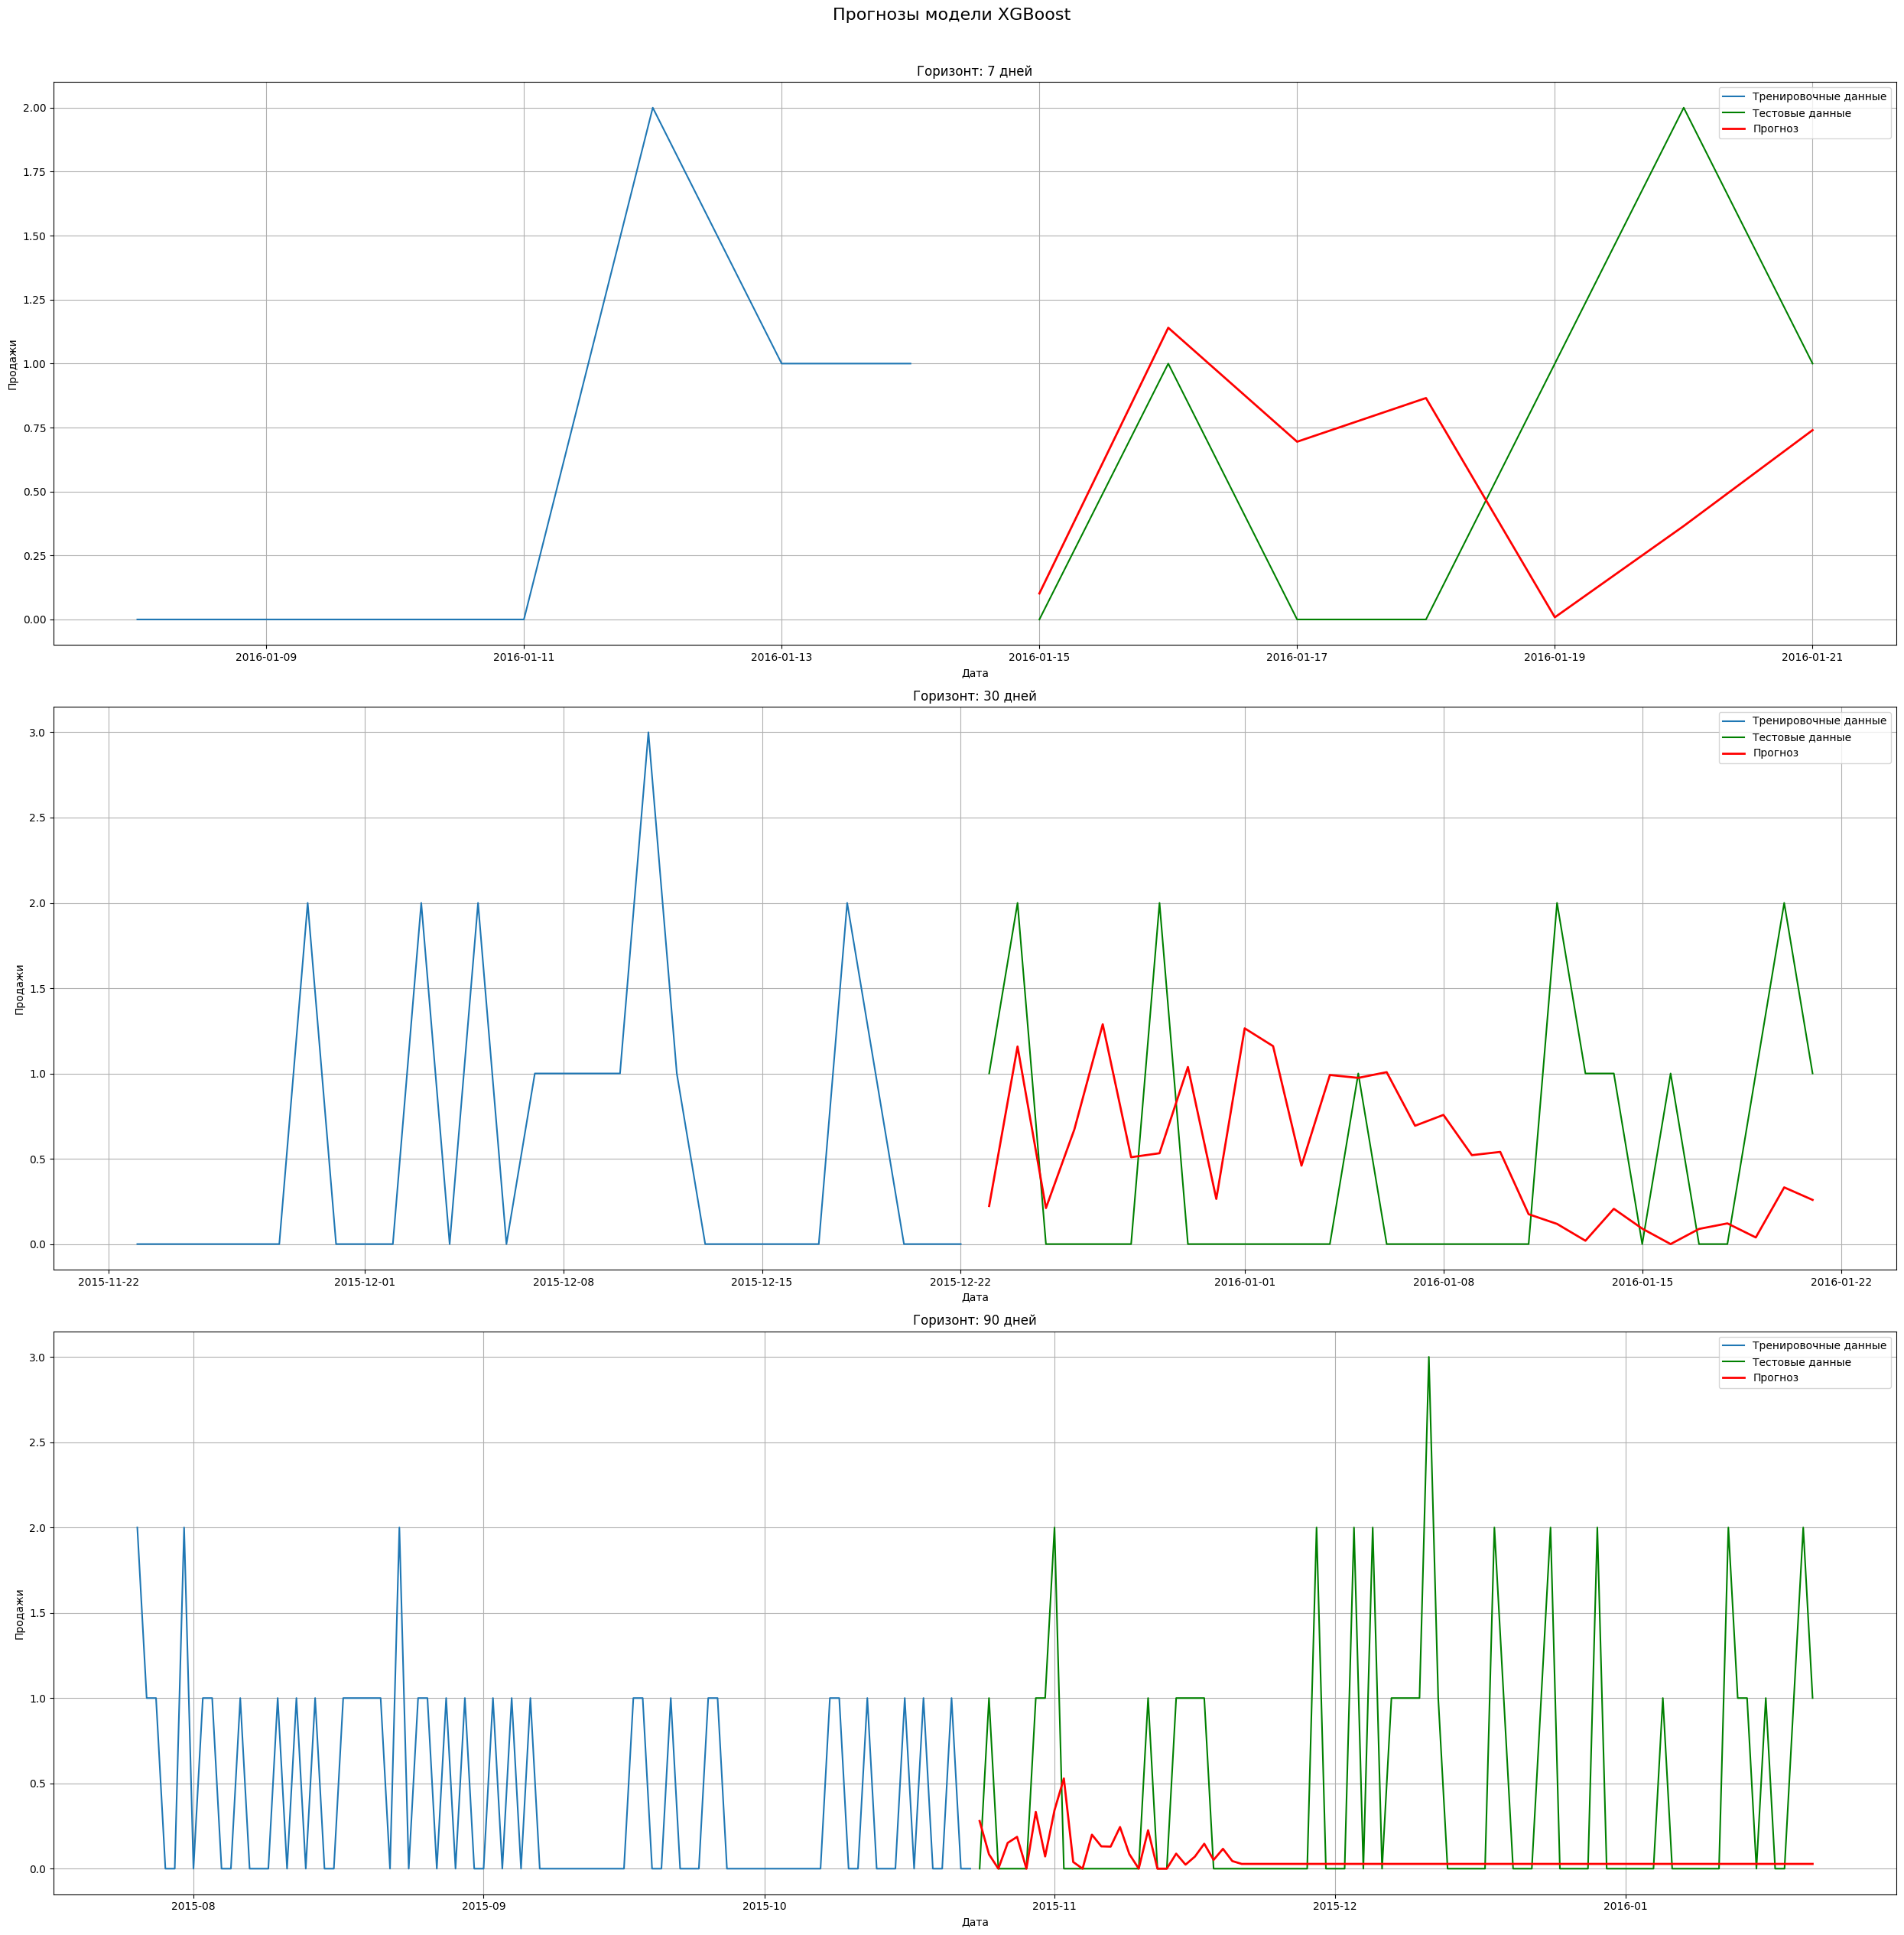

{('XGBoost', 7): {'MAE': 1.154994215284075,
                  'MAPE (%)': 61.03675138382686,
                  'RMSE': 1.4219934839905735,
                  'SMAPE': 102.17833542938834},
 ('XGBoost', 30): {'MAE': 1.0267398754755657,
                   'MAPE (%)': 60.3001195854611,
                   'RMSE': 1.326876671010598,
                   'SMAPE': 100.63404075633646},
 ('XGBoost', 90): {'MAE': 1.4078197121620177,
                   'MAPE (%)': 95.33721907271281,
                   'RMSE': 1.5815582042149963,
                   'SMAPE': 183.6587530046953}}
Product  STORE_1_325


/content/TimeSeries/Processor.py:62: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.mask(outliers, rolling_median)
/content/TimeSeries/Processor.py:62: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.mask(outliers, rolling_median)


{'trend': {'exists': True, 'p_value': 1.0350984177453931e-06, 'slope': -0.0013893729687958914}, 'seasonality': {'exists': False, 'period': 30, 'amplitude': 4.02861581920904}, 'stationarity': {'ADF': {'p_value': 0.017676017862649645, 'stationary': True}, 'KPSS': {'p_value': 0.01, 'stationary': False}}, 'outliers': {'count': 81, 'indices': [Timestamp('2011-09-08 00:00:00'), Timestamp('2011-09-12 00:00:00'), Timestamp('2011-09-17 00:00:00'), Timestamp('2011-09-26 00:00:00'), Timestamp('2011-09-27 00:00:00'), Timestamp('2011-10-01 00:00:00'), Timestamp('2011-10-06 00:00:00'), Timestamp('2011-10-08 00:00:00'), Timestamp('2011-10-09 00:00:00'), Timestamp('2011-10-11 00:00:00'), Timestamp('2011-10-15 00:00:00'), Timestamp('2011-10-17 00:00:00'), Timestamp('2011-11-05 00:00:00'), Timestamp('2011-11-06 00:00:00'), Timestamp('2011-11-08 00:00:00'), Timestamp('2011-11-12 00:00:00'), Timestamp('2011-12-02 00:00:00'), Timestamp('2011-12-05 00:00:00'), Timestamp('2011-12-07 00:00:00'), Timestamp('20

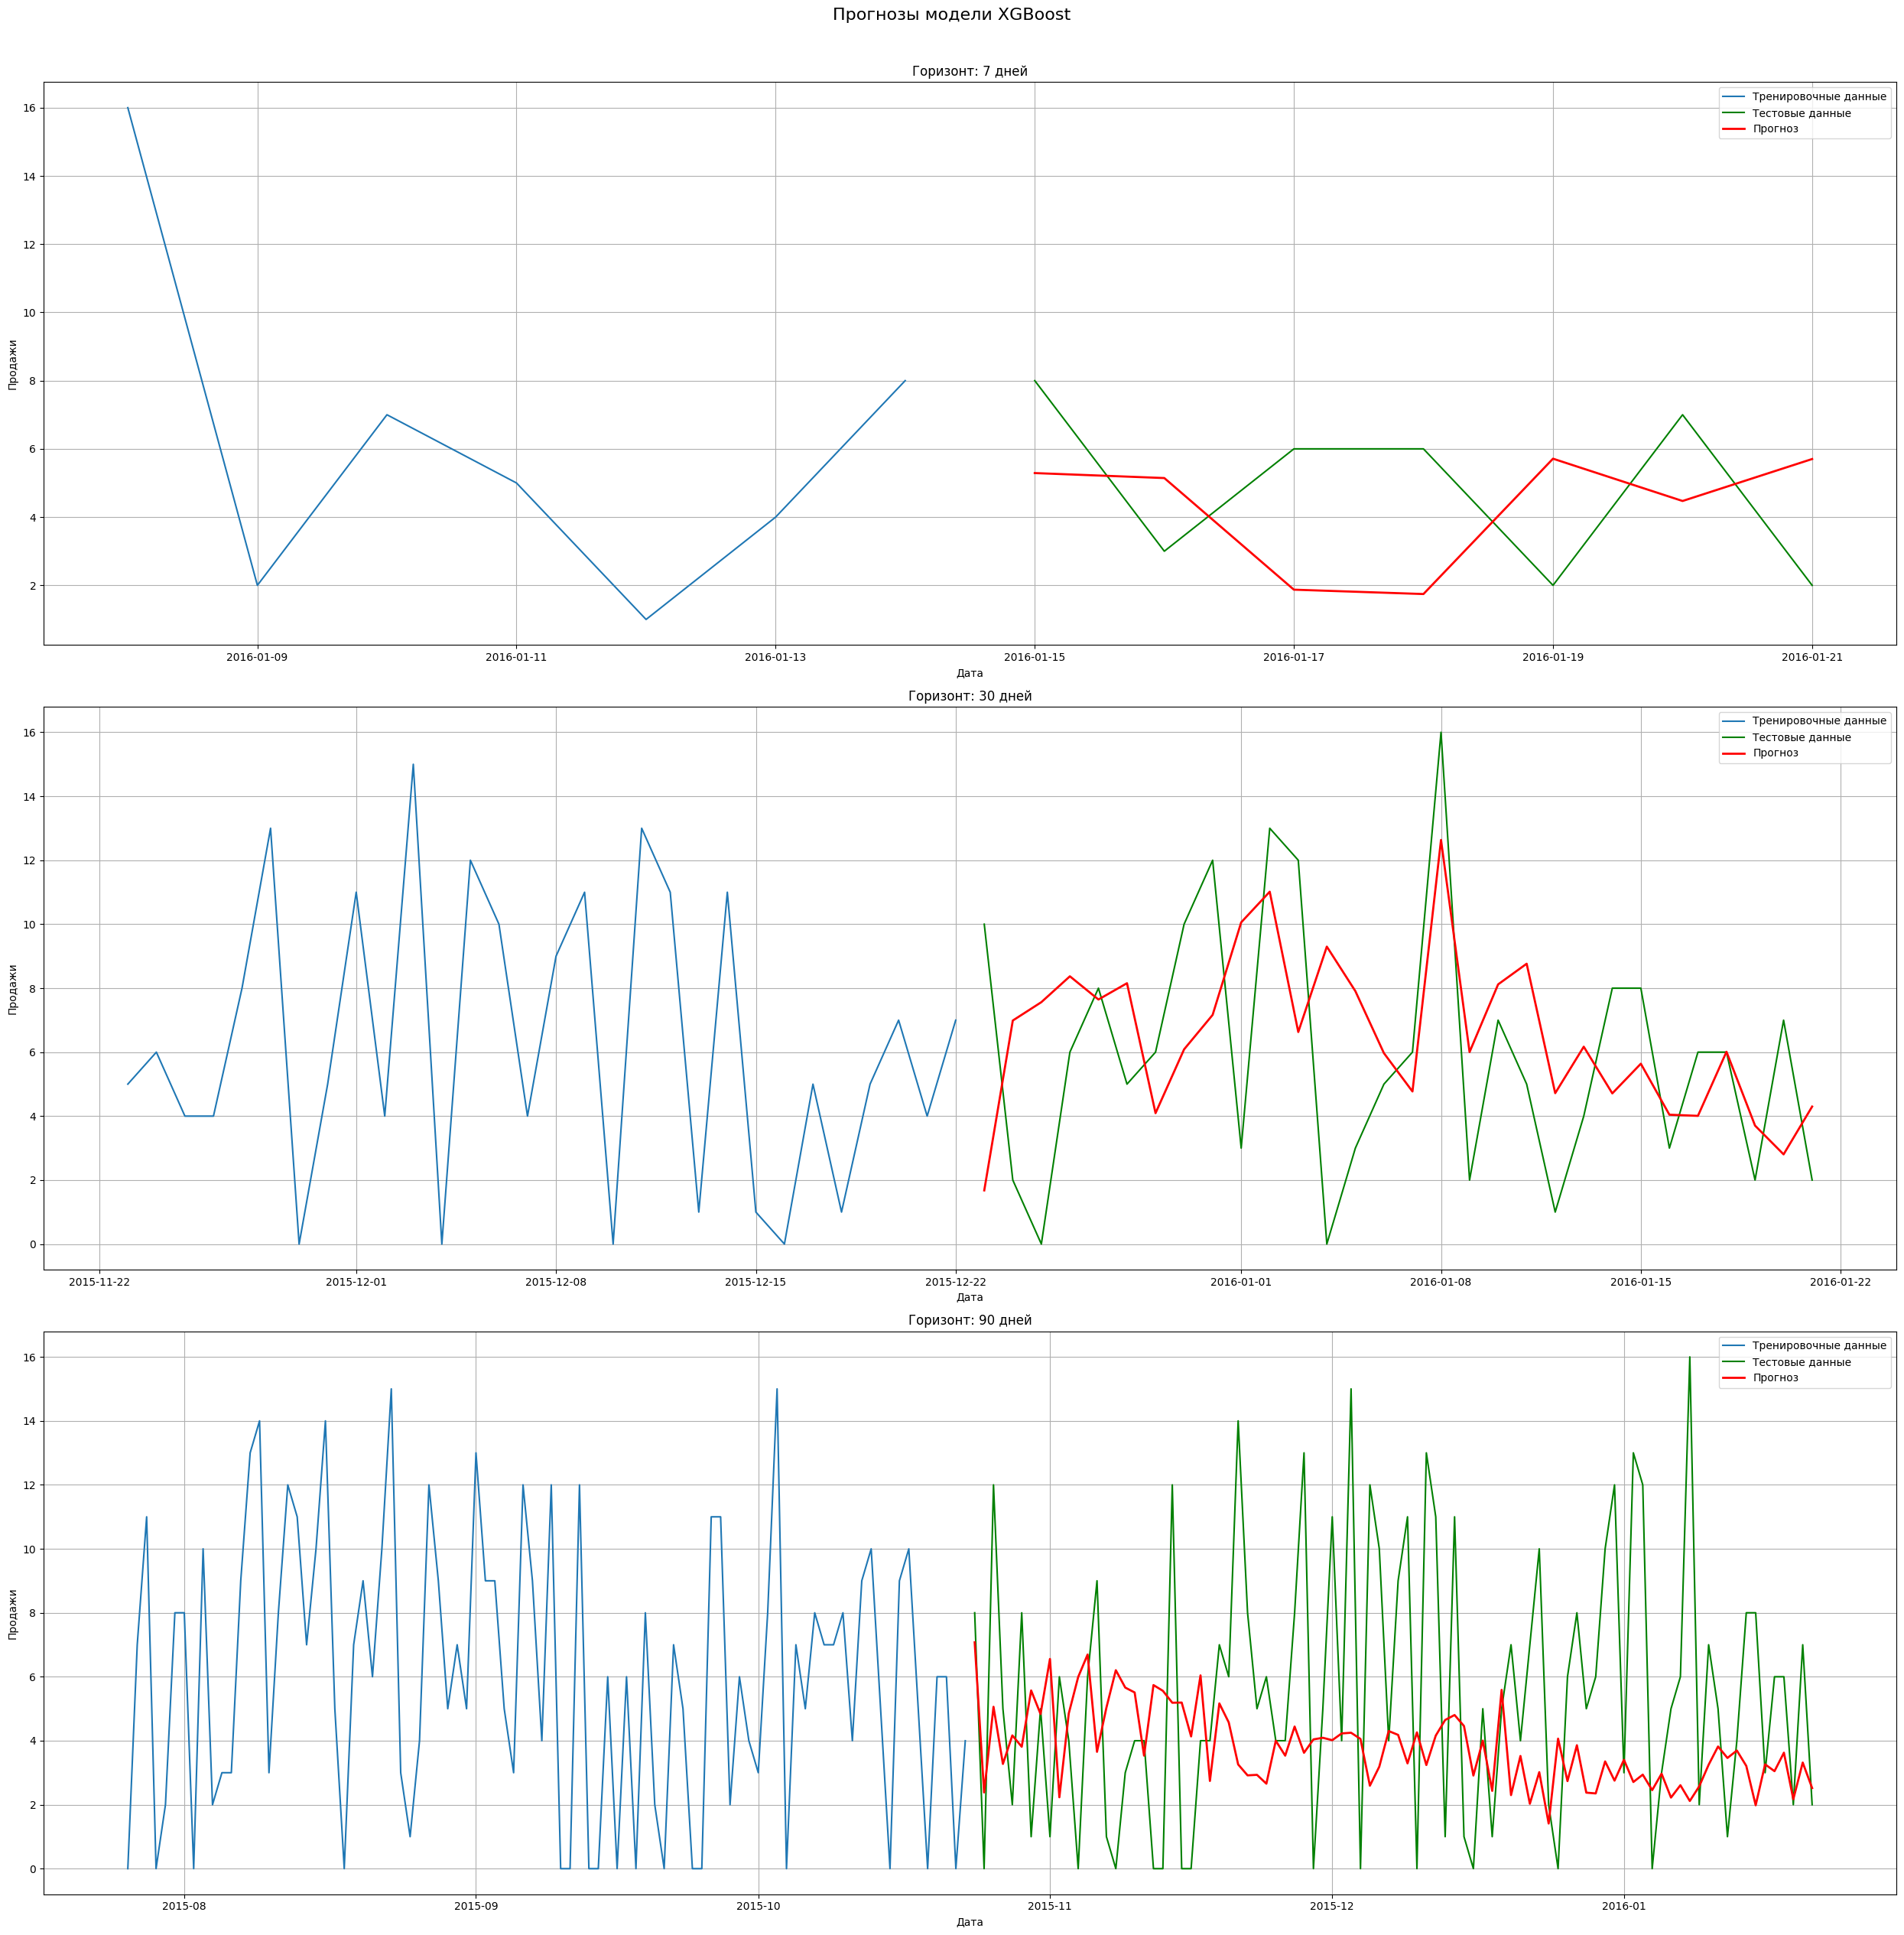

{('XGBoost', 7): {'MAE': 3.4540113721575056,
                  'MAPE (%)': 63.24507126462162,
                  'RMSE': 3.7046936203368728,
                  'SMAPE': 70.51793930897331},
 ('XGBoost', 30): {'MAE': 3.3766607999801637,
                   'MAPE (%)': 95.4864303146703,
                   'RMSE': 4.1209329018109235,
                   'SMAPE': 54.05160949110458},
 ('XGBoost', 90): {'MAE': 4.2265073882208934,
                   'MAPE (%)': 97.06496749915597,
                   'RMSE': 5.33409677307265,
                   'SMAPE': 77.94879072322509}}
Product  STORE_1_376
{'trend': {'exists': True, 'p_value': 2.9495563664880536e-15, 'slope': -0.0005167192044978231}, 'seasonality': {'exists': False, 'period': 30, 'amplitude': 0.554364406779661}, 'stationarity': {'ADF': {'p_value': 1.182095079229537e-05, 'stationary': True}, 'KPSS': {'p_value': 0.01, 'stationary': False}}, 'outliers': {'count': 57, 'indices': [Timestamp('2011-02-04 00:00:00'), Timestamp('2011-02-19 00:00:00'), Ti

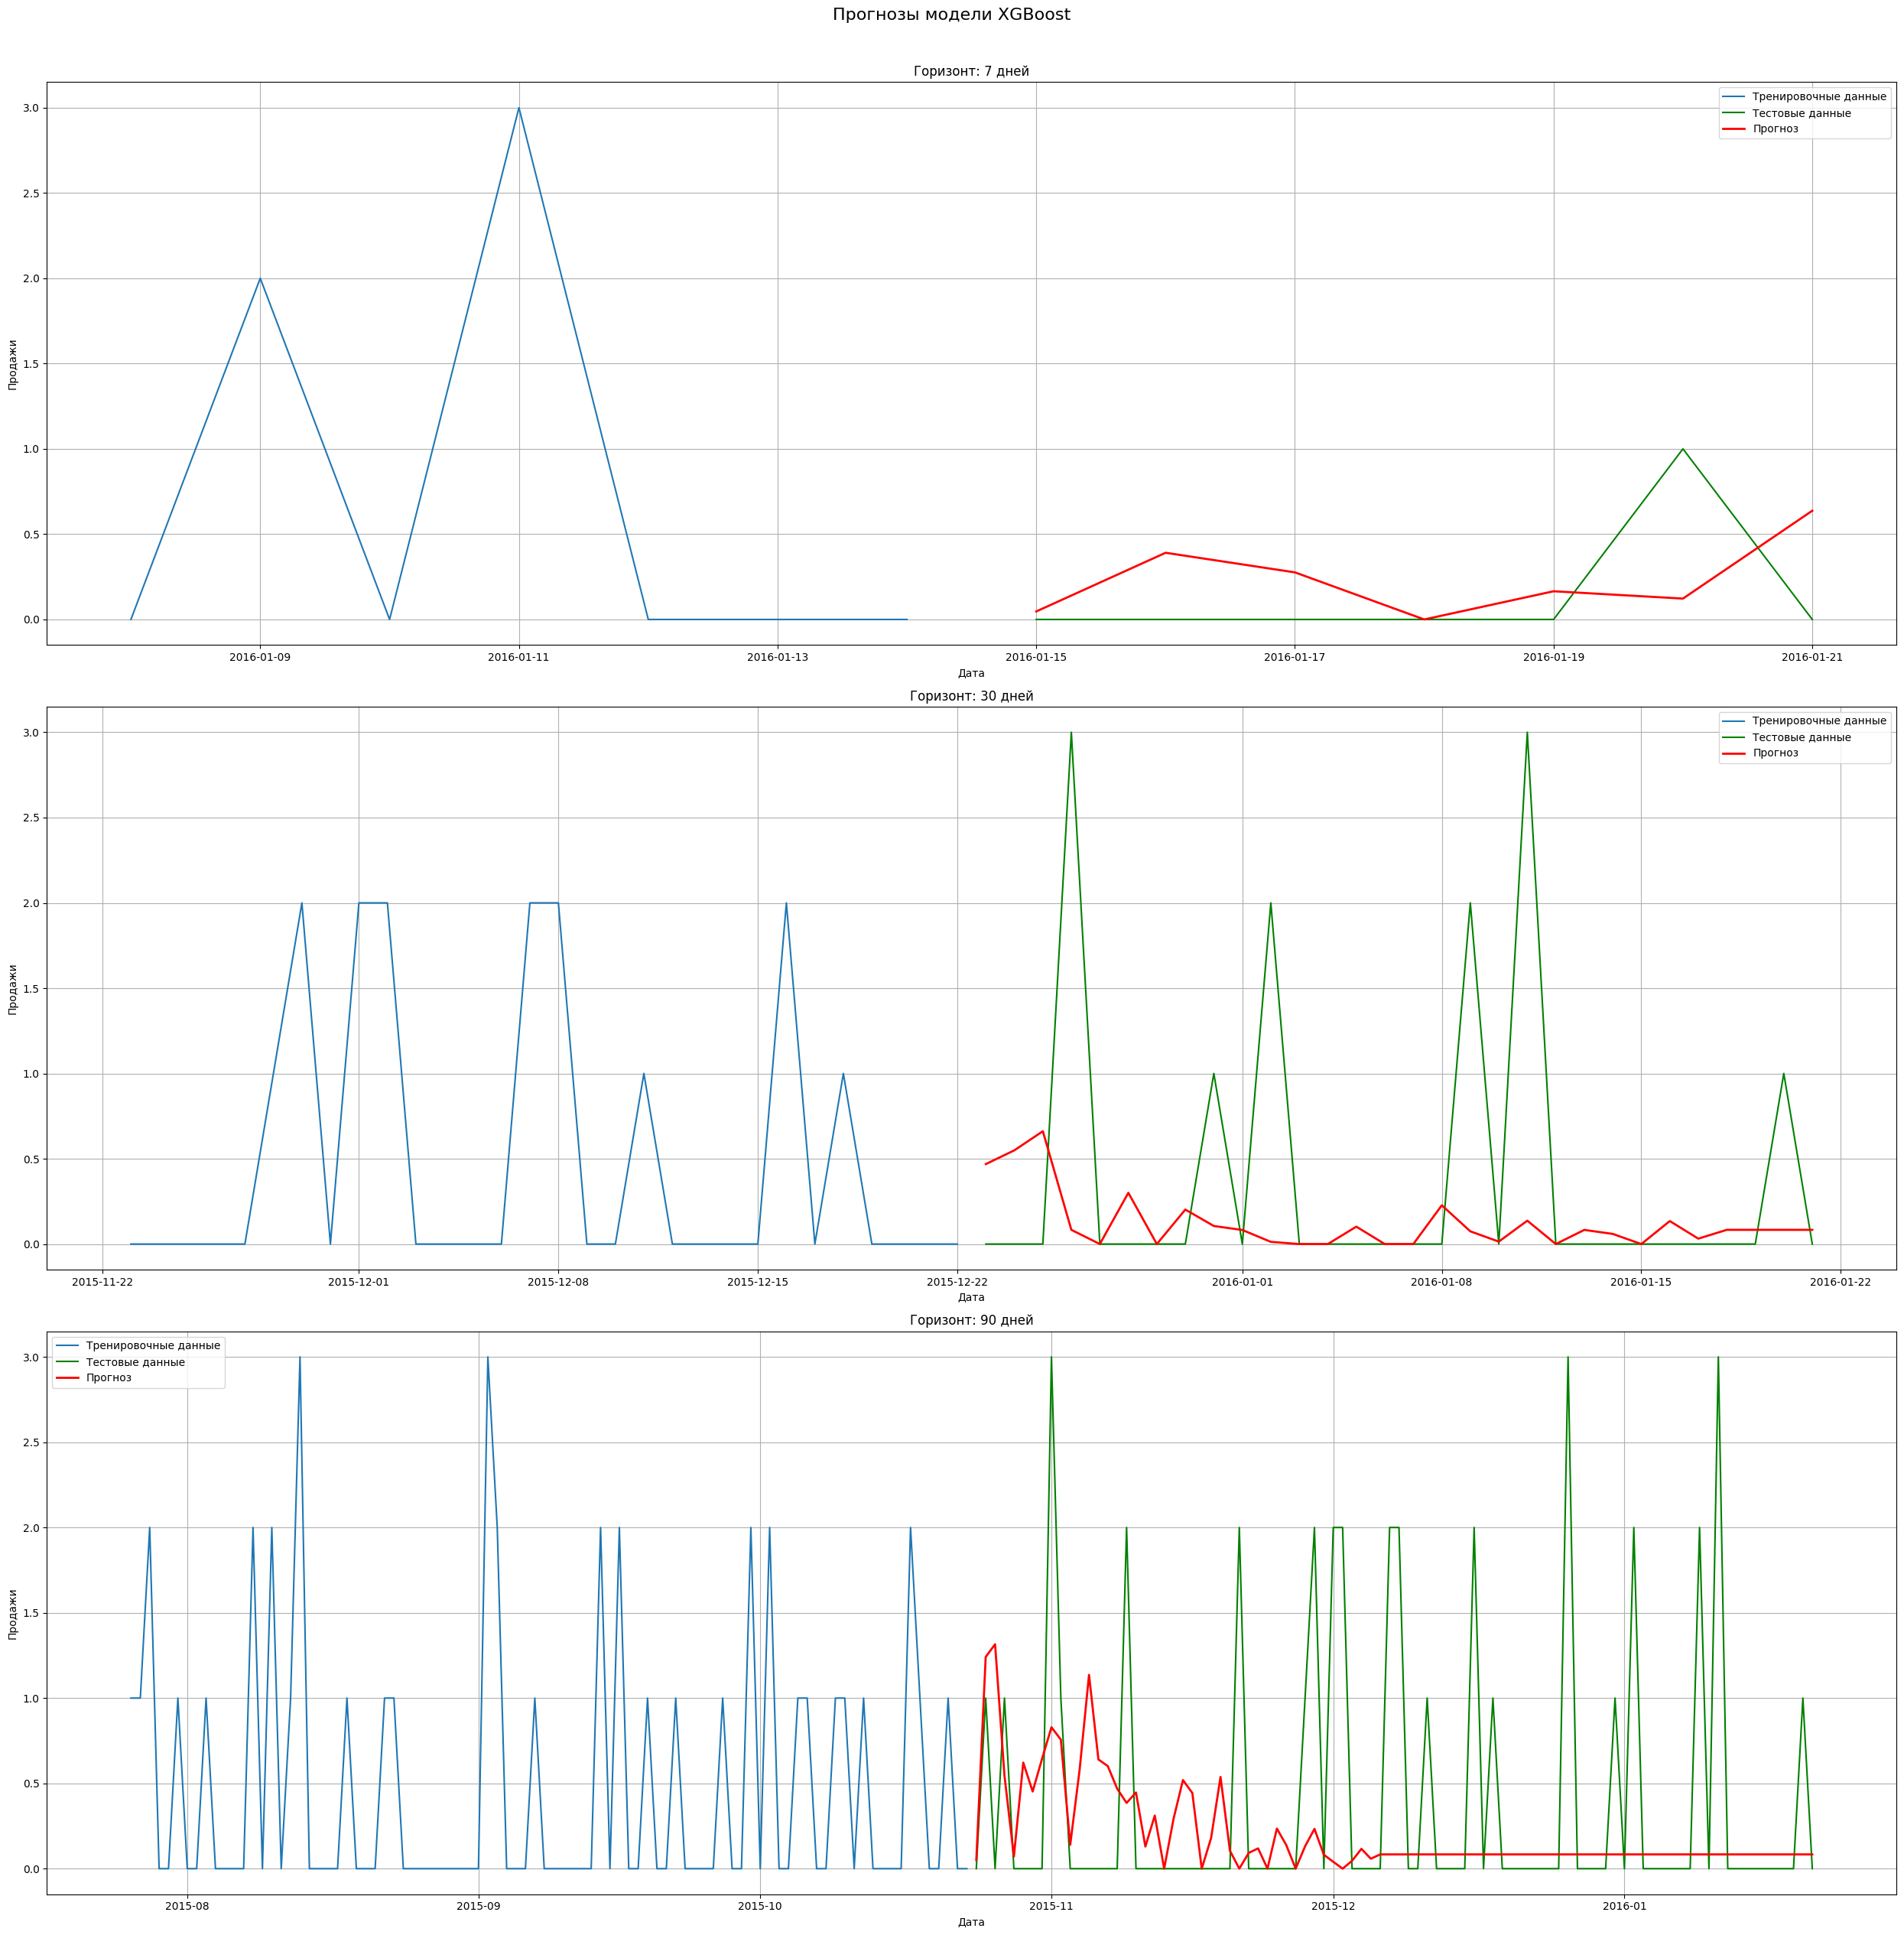

{('XGBoost', 7): {'MAE': 0.9087319203785488,
                  'MAPE (%)': 77.46136784553528,
                  'RMSE': 1.0111739108802729,
                  'SMAPE': 135.37448441310178},
 ('XGBoost', 30): {'MAE': 1.2778337677319844,
                   'MAPE (%)': 88.84465214278964,
                   'RMSE': 1.5692640620243308,
                   'SMAPE': 166.33447553811592},
 ('XGBoost', 90): {'MAE': 1.2137801700168185,
                   'MAPE (%)': 83.56546103954315,
                   'RMSE': 1.4746880029535185,
                   'SMAPE': 151.07485509906425}}
Product  STORE_1_090


/content/TimeSeries/Processor.py:62: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.mask(outliers, rolling_median)
/content/TimeSeries/Processor.py:62: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.mask(outliers, rolling_median)


{'trend': {'exists': False, 'p_value': 0.886562331285618, 'slope': 0.00035507124104384866}, 'seasonality': {'exists': False, 'period': 30, 'amplitude': 19.676031073446325}, 'stationarity': {'ADF': {'p_value': 0.00043298284979071316, 'stationary': True}, 'KPSS': {'p_value': 0.04062450872213002, 'stationary': False}}, 'outliers': {'count': 91, 'indices': [Timestamp('2011-02-05 00:00:00'), Timestamp('2011-02-06 00:00:00'), Timestamp('2011-02-08 00:00:00'), Timestamp('2011-10-02 00:00:00'), Timestamp('2011-10-07 00:00:00'), Timestamp('2011-10-08 00:00:00'), Timestamp('2011-10-09 00:00:00'), Timestamp('2011-10-16 00:00:00'), Timestamp('2011-12-03 00:00:00'), Timestamp('2011-12-16 00:00:00'), Timestamp('2011-12-19 00:00:00'), Timestamp('2011-12-22 00:00:00'), Timestamp('2011-12-23 00:00:00'), Timestamp('2011-12-24 00:00:00'), Timestamp('2011-12-31 00:00:00'), Timestamp('2012-01-14 00:00:00'), Timestamp('2012-01-21 00:00:00'), Timestamp('2012-03-28 00:00:00'), Timestamp('2012-06-17 00:00:00')

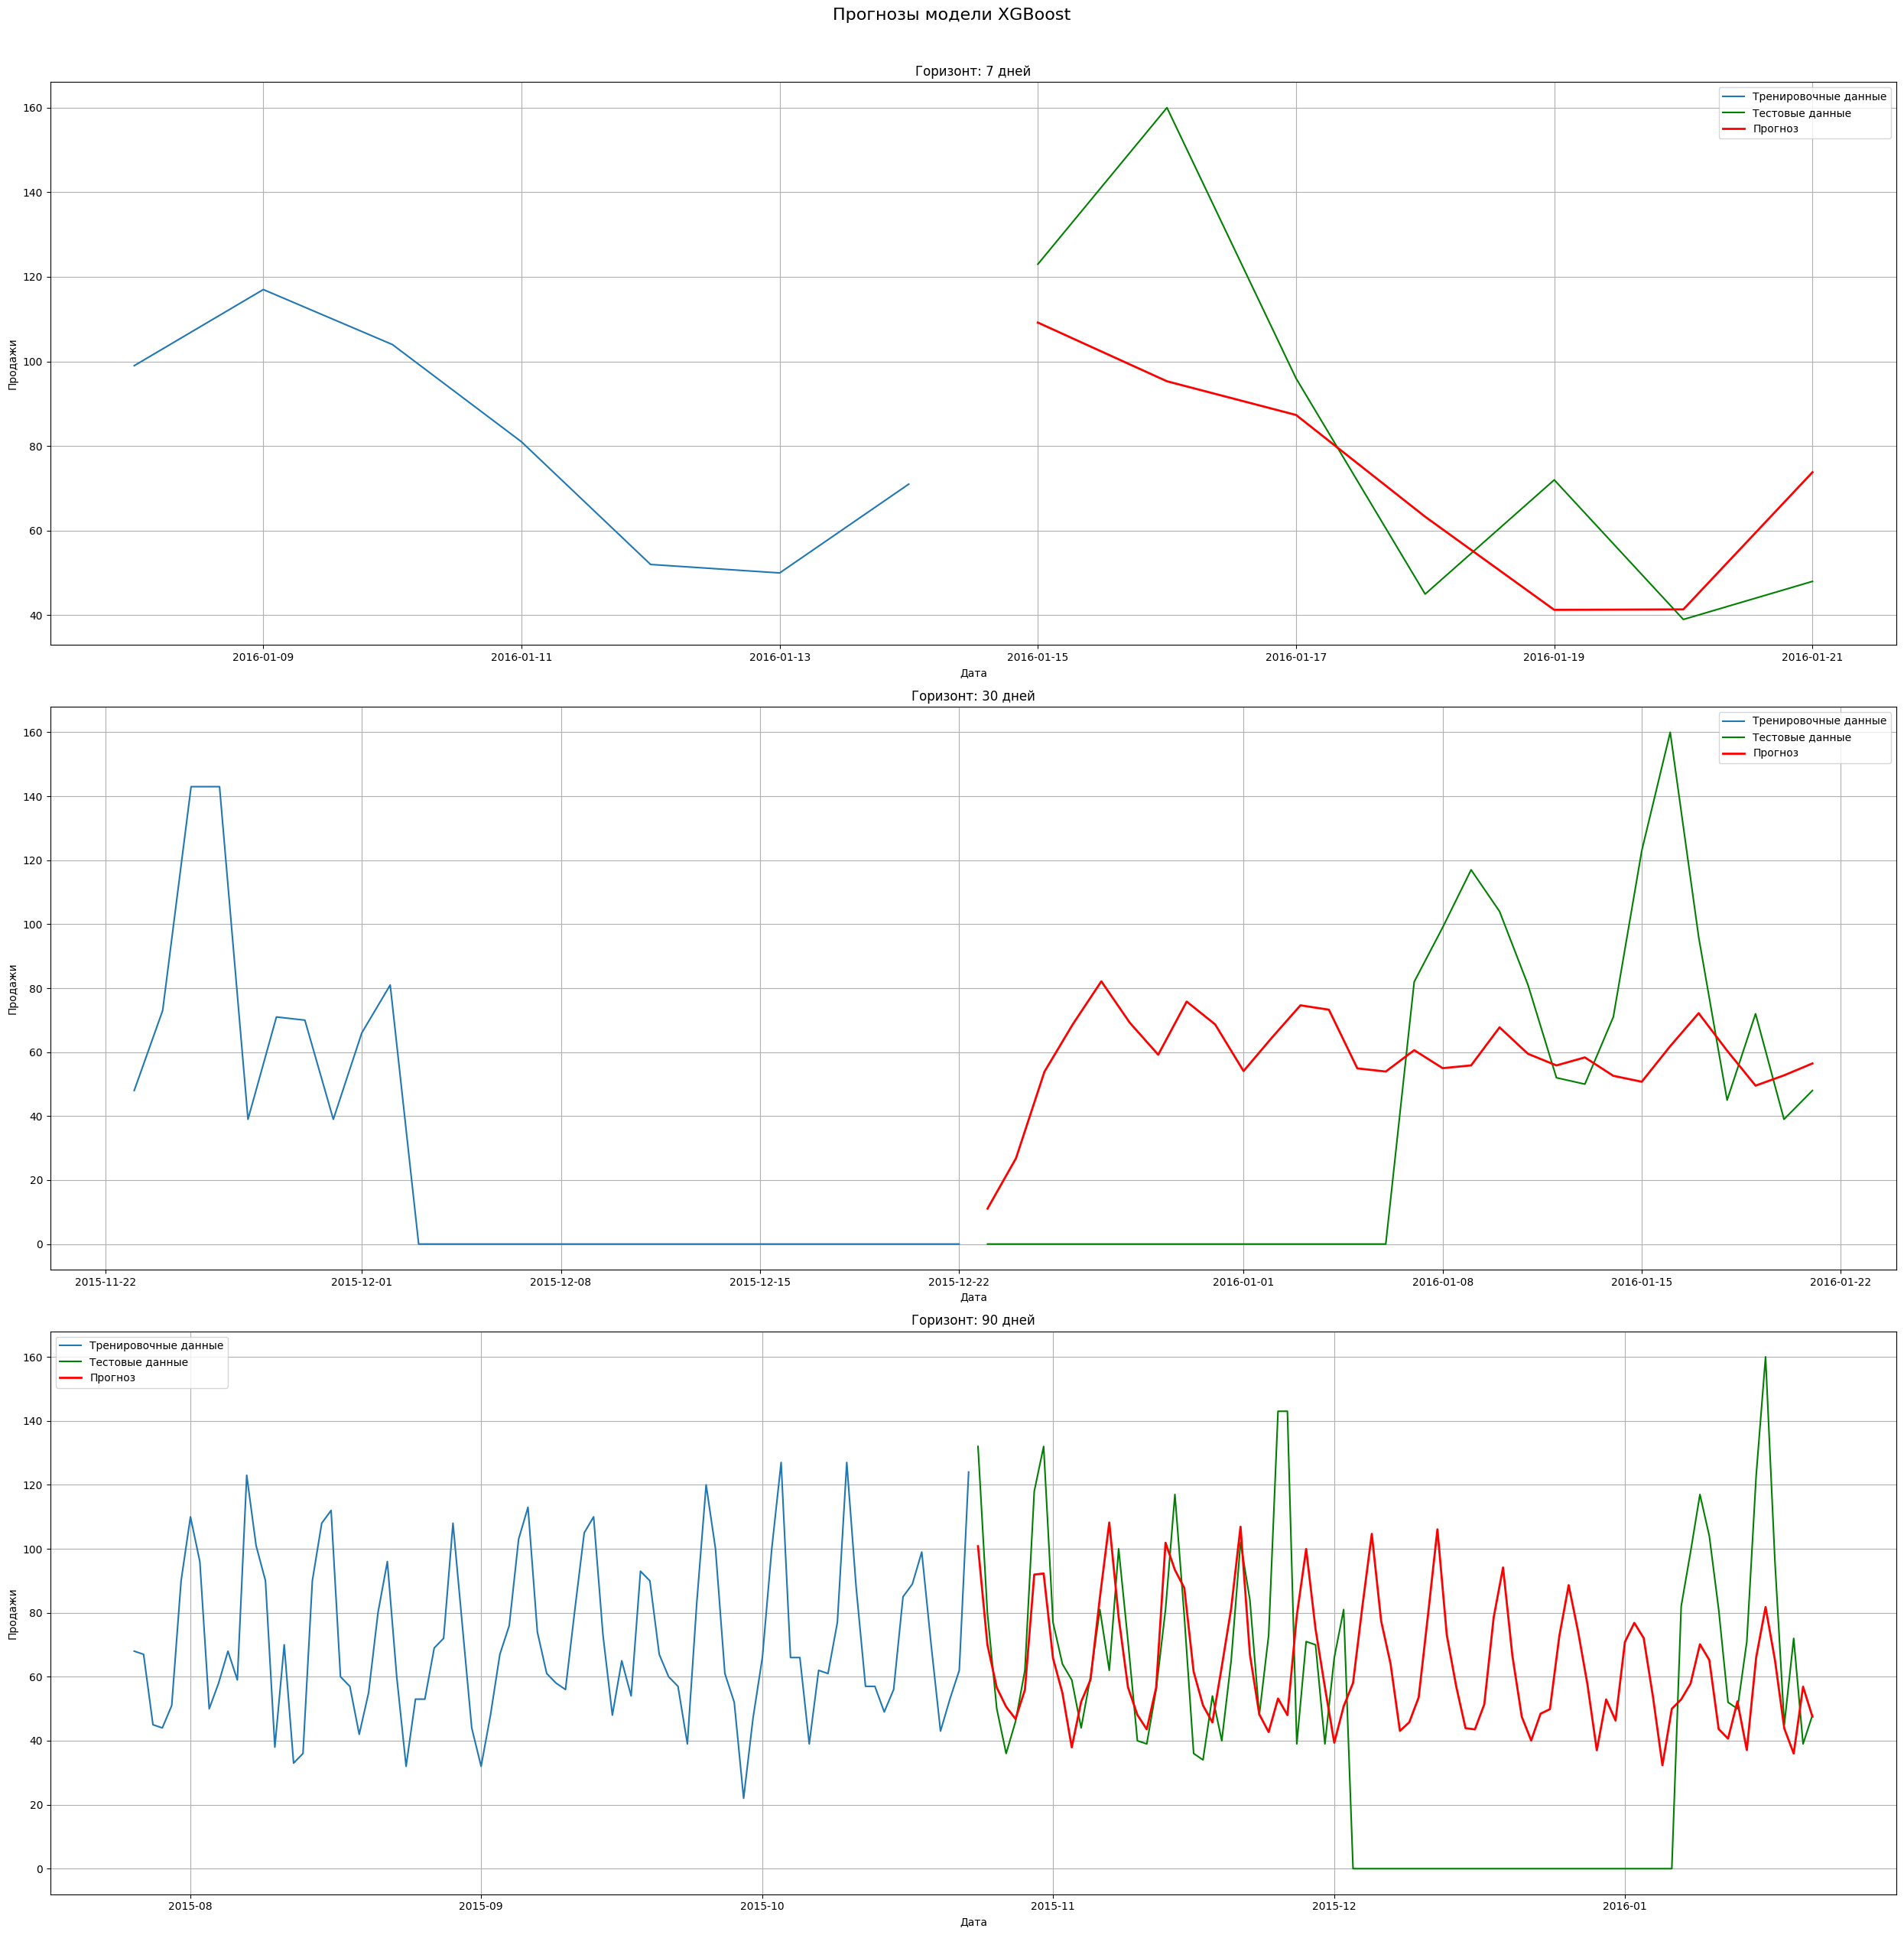

{('XGBoost', 7): {'MAE': 23.62088121686663,
                  'MAPE (%)': 28.257662400506167,
                  'RMSE': 30.58916296578796,
                  'SMAPE': 29.34015143702832},
 ('XGBoost', 30): {'MAE': 45.008899275461836,
                   'MAPE (%)': 2936.3624768831432,
                   'RMSE': 52.17872529889266,
                   'SMAPE': 115.59179992026655},
 ('XGBoost', 90): {'MAE': 38.28719452752007,
                   'MAPE (%)': 2415.8946879301693,
                   'RMSE': 47.165270215187185,
                   'SMAPE': 94.50485603409842}}
Product  STORE_1_252


/content/TimeSeries/Processor.py:62: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.mask(outliers, rolling_median)
/content/TimeSeries/Processor.py:62: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.mask(outliers, rolling_median)


{'trend': {'exists': True, 'p_value': 7.019950329527481e-91, 'slope': -0.00978882645014074}, 'seasonality': {'exists': False, 'period': 30, 'amplitude': 3.022419962335216}, 'stationarity': {'ADF': {'p_value': 0.11955666818118088, 'stationary': False}, 'KPSS': {'p_value': 0.01, 'stationary': False}}, 'outliers': {'count': 90, 'indices': [Timestamp('2011-05-21 00:00:00'), Timestamp('2011-05-22 00:00:00'), Timestamp('2011-05-30 00:00:00'), Timestamp('2011-06-04 00:00:00'), Timestamp('2011-06-06 00:00:00'), Timestamp('2011-06-07 00:00:00'), Timestamp('2011-06-08 00:00:00'), Timestamp('2011-06-14 00:00:00'), Timestamp('2011-06-18 00:00:00'), Timestamp('2011-07-01 00:00:00'), Timestamp('2011-07-02 00:00:00'), Timestamp('2011-07-03 00:00:00'), Timestamp('2011-07-05 00:00:00'), Timestamp('2011-07-08 00:00:00'), Timestamp('2011-07-09 00:00:00'), Timestamp('2011-07-10 00:00:00'), Timestamp('2011-07-15 00:00:00'), Timestamp('2011-07-16 00:00:00'), Timestamp('2011-07-17 00:00:00'), Timestamp('2011

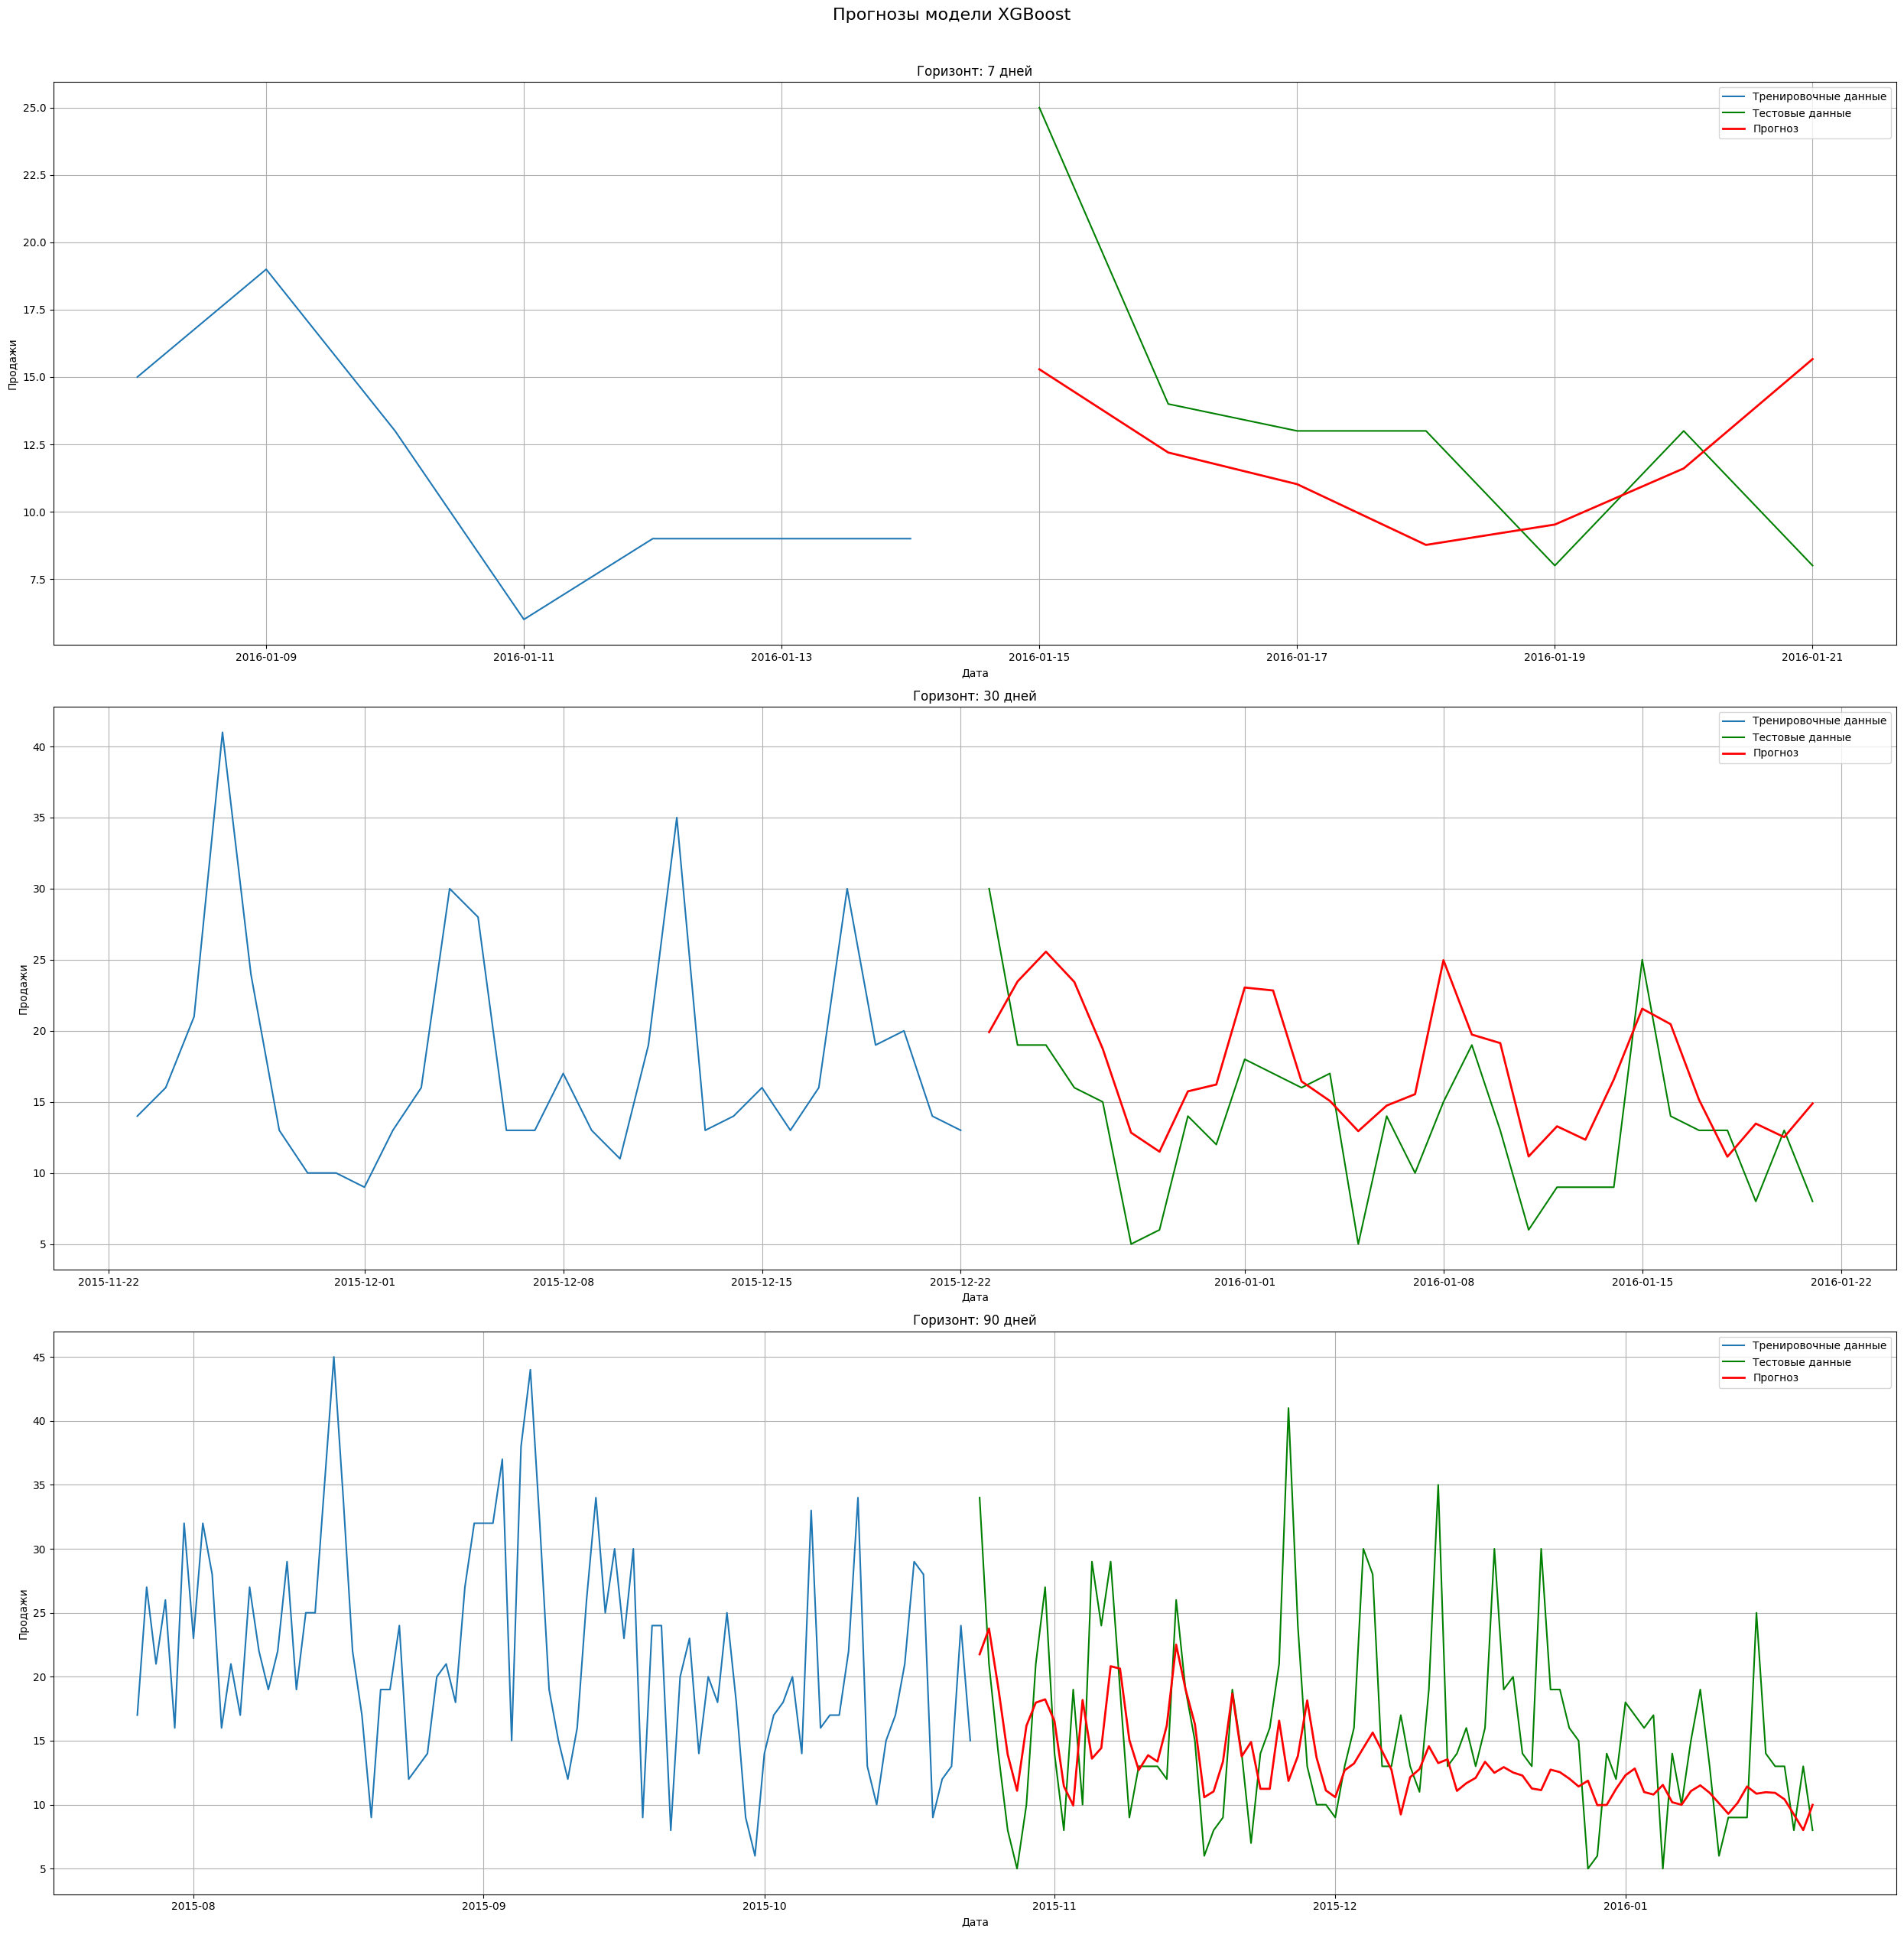

{('XGBoost', 7): {'MAE': 4.472677367074149,
                  'MAPE (%)': 30.787522981205516,
                  'RMSE': 5.468194786578567,
                  'SMAPE': 31.523729560687148},
 ('XGBoost', 30): {'MAE': 4.173500315348307,
                   'MAPE (%)': 35.12293701983715,
                   'RMSE': 4.865505085624521,
                   'SMAPE': 28.463365869317936},
 ('XGBoost', 90): {'MAE': 5.403900379604764,
                   'MAPE (%)': 30.620680508265472,
                   'RMSE': 7.586273024246091,
                   'SMAPE': 33.34908783122046}}
Product  STORE_1_339


/content/TimeSeries/Processor.py:62: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.mask(outliers, rolling_median)
/content/TimeSeries/Processor.py:62: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.mask(outliers, rolling_median)


{'trend': {'exists': True, 'p_value': 7.624584892685903e-05, 'slope': -0.000711799336329189}, 'seasonality': {'exists': False, 'period': 30, 'amplitude': 1.4637758945386063}, 'stationarity': {'ADF': {'p_value': 0.00035177445257587365, 'stationary': True}, 'KPSS': {'p_value': 0.031790277300838415, 'stationary': False}}, 'outliers': {'count': 87, 'indices': [Timestamp('2011-02-10 00:00:00'), Timestamp('2011-03-19 00:00:00'), Timestamp('2011-03-26 00:00:00'), Timestamp('2011-04-02 00:00:00'), Timestamp('2011-04-08 00:00:00'), Timestamp('2011-10-08 00:00:00'), Timestamp('2011-10-09 00:00:00'), Timestamp('2011-10-10 00:00:00'), Timestamp('2011-10-11 00:00:00'), Timestamp('2011-10-12 00:00:00'), Timestamp('2011-10-14 00:00:00'), Timestamp('2011-10-15 00:00:00'), Timestamp('2011-10-16 00:00:00'), Timestamp('2011-10-17 00:00:00'), Timestamp('2011-10-18 00:00:00'), Timestamp('2011-11-02 00:00:00'), Timestamp('2011-11-05 00:00:00'), Timestamp('2011-11-09 00:00:00'), Timestamp('2011-11-12 00:00:0

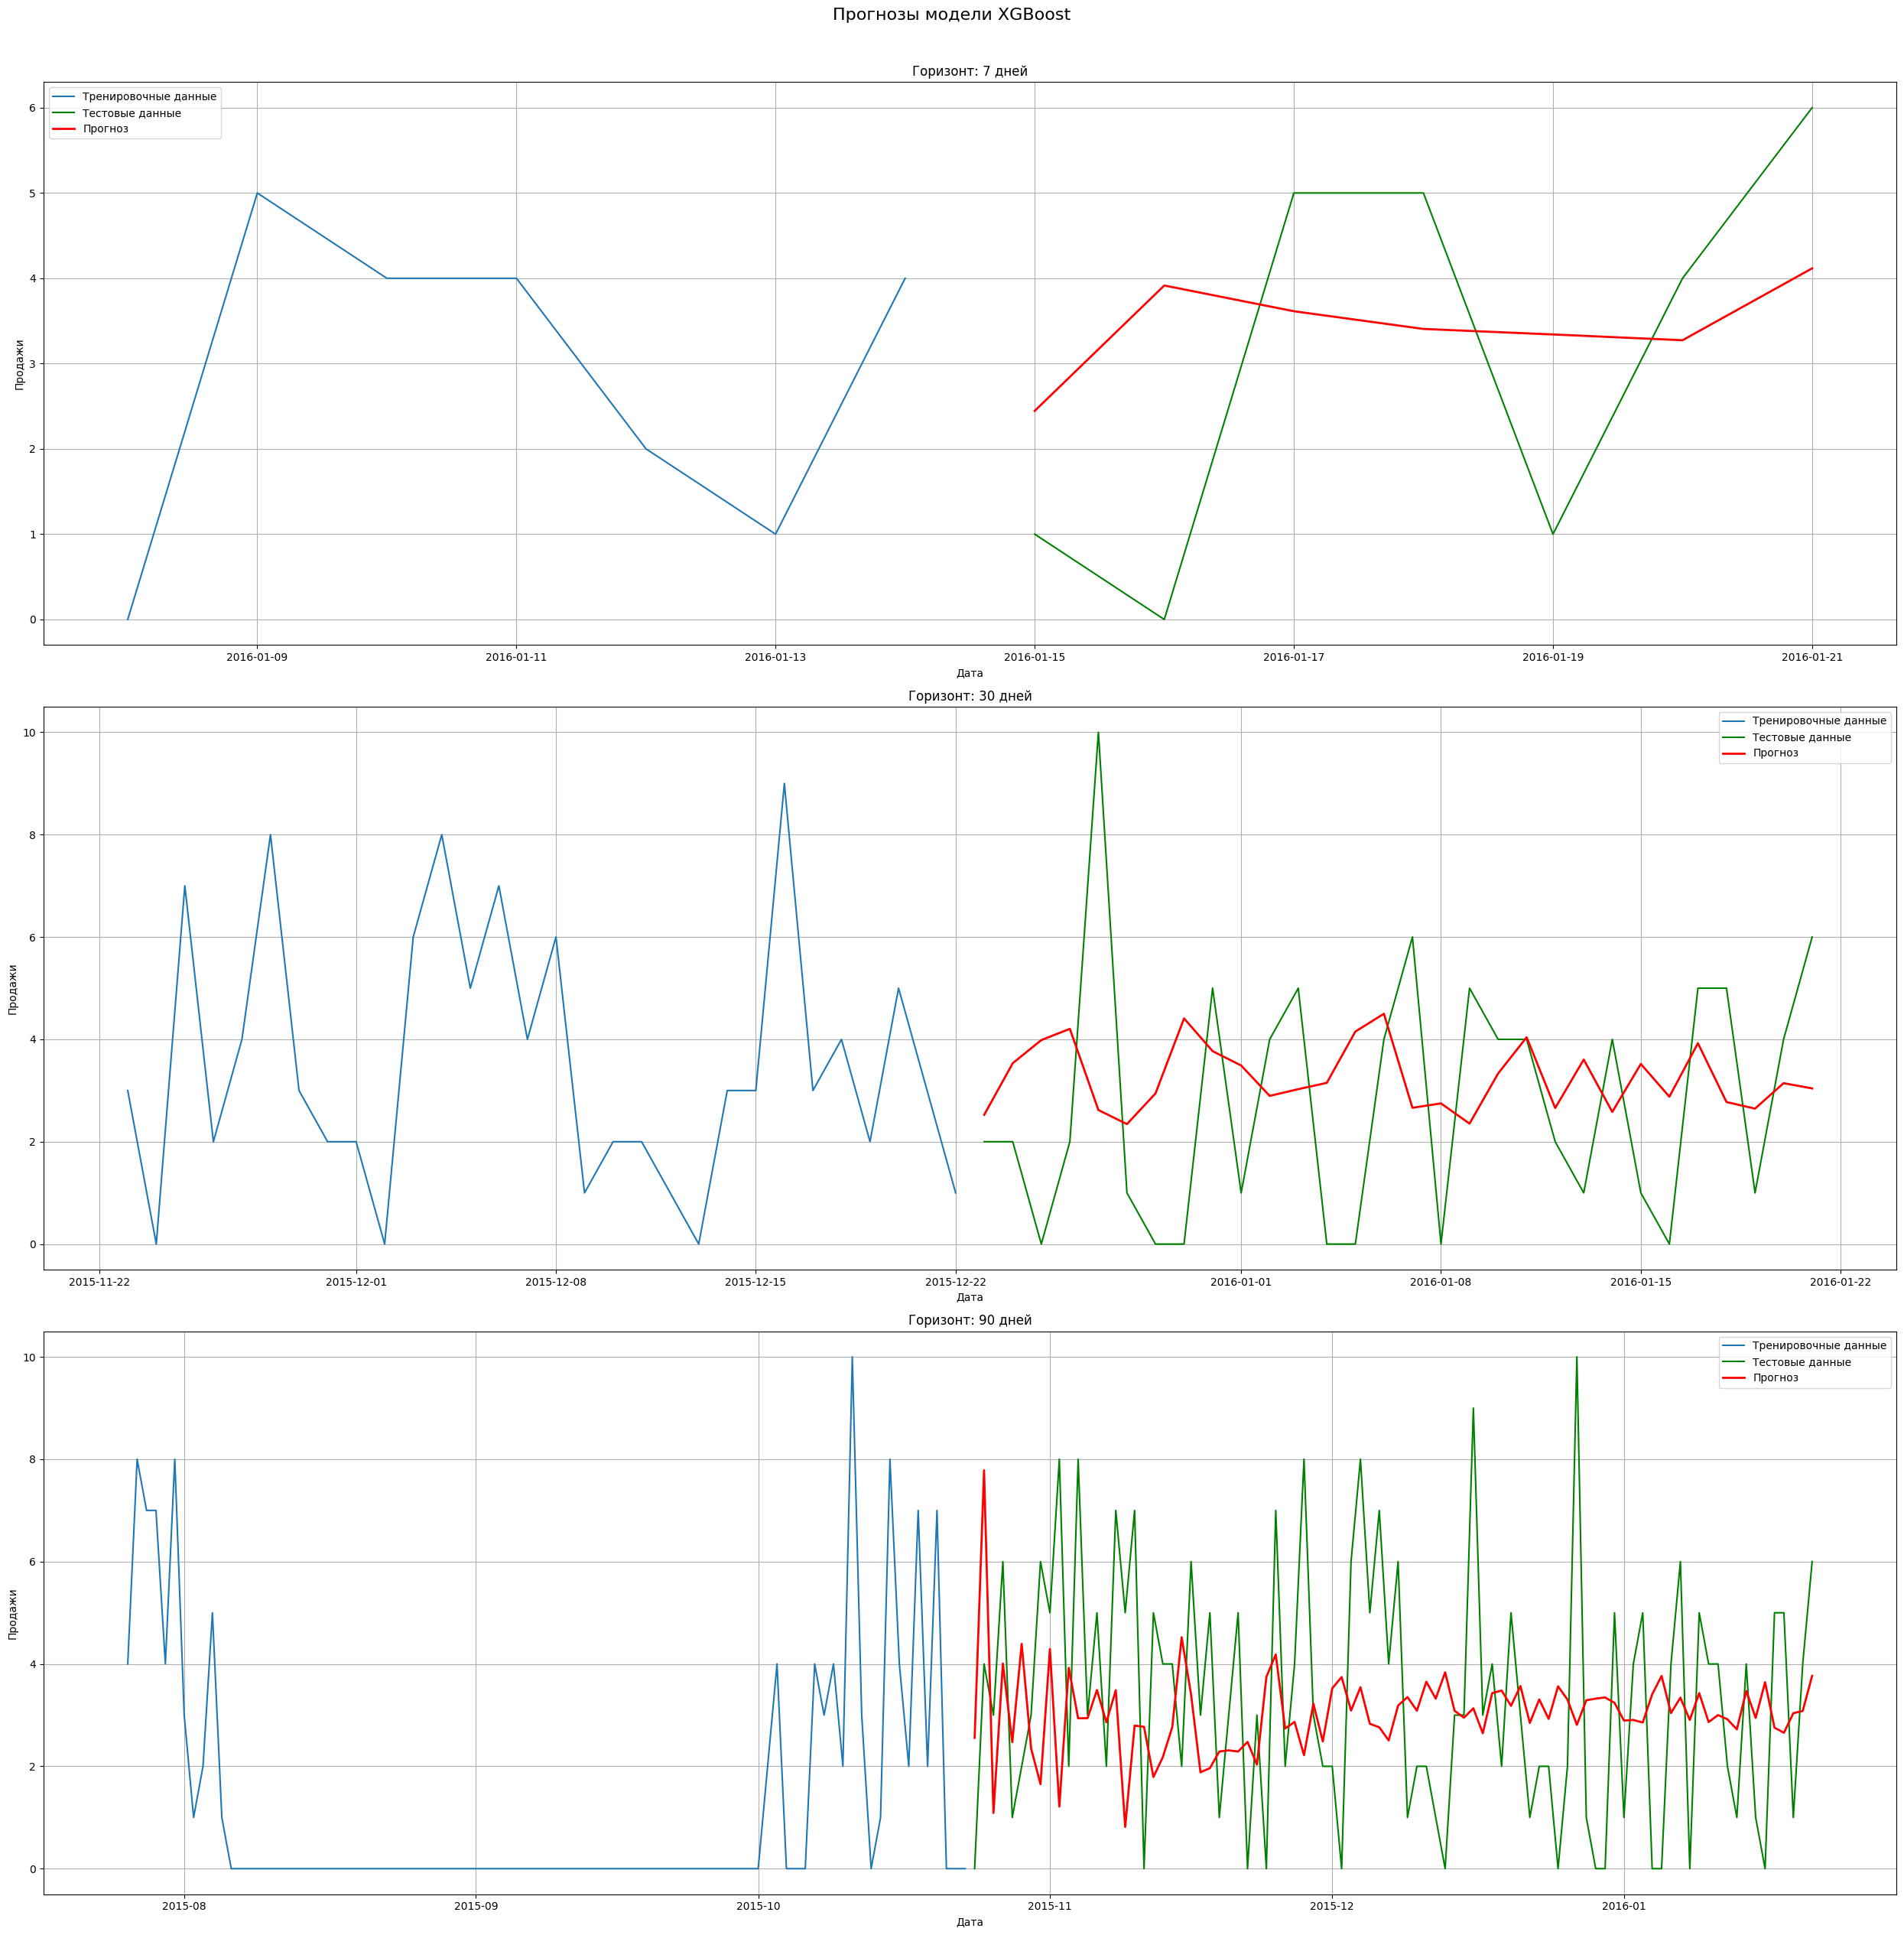

{('XGBoost', 7): {'MAE': 2.0417864322662354,
                  'MAPE (%)': 77.08426084648184,
                  'RMSE': 2.210911455209783,
                  'SMAPE': 55.328581785075826},
 ('XGBoost', 30): {'MAE': 2.192000945409139,
                   'MAPE (%)': 90.4259097455728,
                   'RMSE': 2.704281650266401,
                   'SMAPE': 63.00506439533192},
 ('XGBoost', 90): {'MAE': 2.410935766167111,
                   'MAPE (%)': 70.82377839158204,
                   'RMSE': 2.985195103355996,
                   'SMAPE': 62.91099826953659}}
Product  STORE_1_546


/content/TimeSeries/Processor.py:62: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.mask(outliers, rolling_median)
/content/TimeSeries/Processor.py:62: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.mask(outliers, rolling_median)


{'trend': {'exists': True, 'p_value': 3.0619040889477025e-15, 'slope': -0.0010088607408427336}, 'seasonality': {'exists': False, 'period': 30, 'amplitude': 0.9488323917137477}, 'stationarity': {'ADF': {'p_value': 7.452968594977263e-05, 'stationary': True}, 'KPSS': {'p_value': 0.01, 'stationary': False}}, 'outliers': {'count': 84, 'indices': [Timestamp('2011-02-12 00:00:00'), Timestamp('2011-03-02 00:00:00'), Timestamp('2011-03-04 00:00:00'), Timestamp('2011-03-05 00:00:00'), Timestamp('2011-04-16 00:00:00'), Timestamp('2011-04-17 00:00:00'), Timestamp('2011-07-03 00:00:00'), Timestamp('2011-07-10 00:00:00'), Timestamp('2011-07-16 00:00:00'), Timestamp('2011-07-17 00:00:00'), Timestamp('2011-08-01 00:00:00'), Timestamp('2011-08-02 00:00:00'), Timestamp('2011-08-07 00:00:00'), Timestamp('2011-08-10 00:00:00'), Timestamp('2011-08-14 00:00:00'), Timestamp('2011-08-15 00:00:00'), Timestamp('2011-09-03 00:00:00'), Timestamp('2011-09-11 00:00:00'), Timestamp('2012-03-12 00:00:00'), Timestamp(

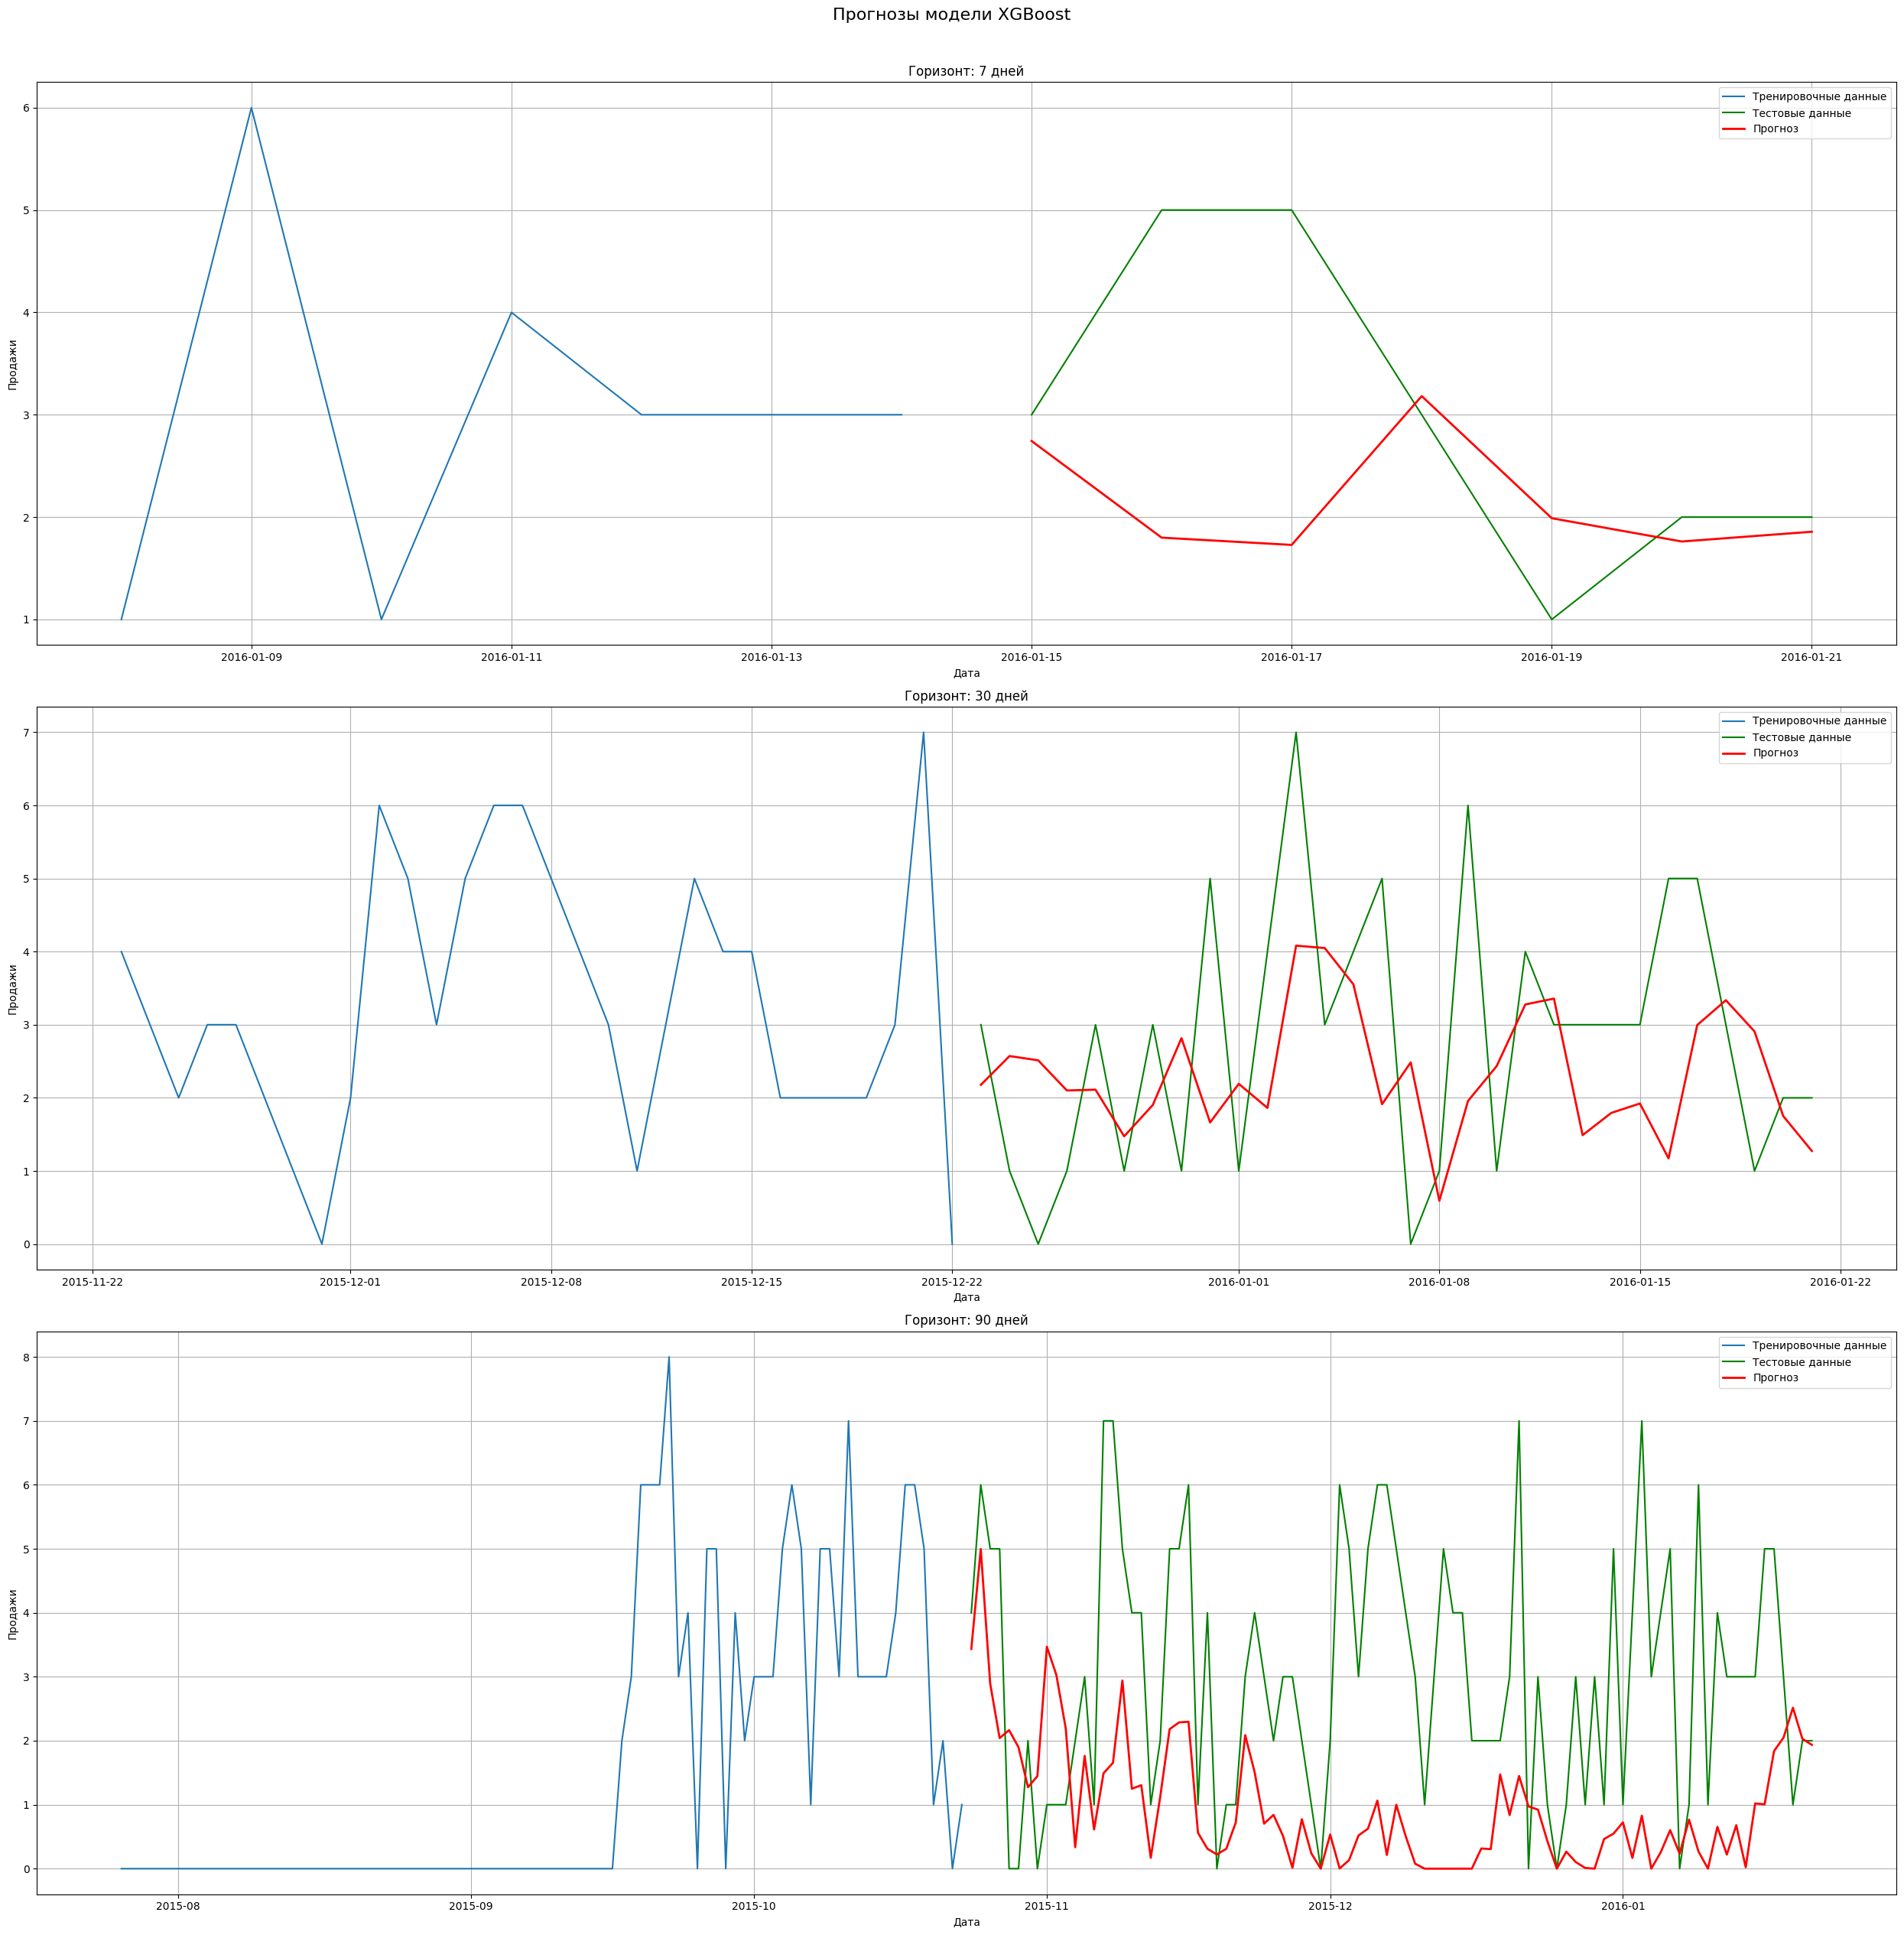

{('XGBoost', 7): {'MAE': 1.8484032154083252,
                  'MAPE (%)': 38.997829528081986,
                  'RMSE': 2.4195664893344793,
                  'SMAPE': 53.989519263427574},
 ('XGBoost', 30): {'MAE': 1.8805280447006225,
                   'MAPE (%)': 50.46373148191543,
                   'RMSE': 2.3418427615352186,
                   'SMAPE': 60.0683142444402},
 ('XGBoost', 90): {'MAE': 3.142237162590027,
                   'MAPE (%)': 77.42766569893828,
                   'RMSE': 3.6243110130816882,
                   'SMAPE': 131.03194857342535}}
Product  STORE_1_547


/content/TimeSeries/Processor.py:62: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.mask(outliers, rolling_median)
/content/TimeSeries/Processor.py:62: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.mask(outliers, rolling_median)


{'trend': {'exists': True, 'p_value': 5.406951714446902e-36, 'slope': -0.009824852562402845}, 'seasonality': {'exists': False, 'period': 30, 'amplitude': 10.786111111111111}, 'stationarity': {'ADF': {'p_value': 1.3715267900503456e-05, 'stationary': True}, 'KPSS': {'p_value': 0.01, 'stationary': False}}, 'outliers': {'count': 86, 'indices': [Timestamp('2011-02-03 00:00:00'), Timestamp('2011-02-09 00:00:00'), Timestamp('2011-02-11 00:00:00'), Timestamp('2011-02-12 00:00:00'), Timestamp('2011-02-27 00:00:00'), Timestamp('2011-03-02 00:00:00'), Timestamp('2011-03-14 00:00:00'), Timestamp('2011-04-12 00:00:00'), Timestamp('2011-06-05 00:00:00'), Timestamp('2011-07-11 00:00:00'), Timestamp('2011-07-15 00:00:00'), Timestamp('2011-07-16 00:00:00'), Timestamp('2011-07-17 00:00:00'), Timestamp('2011-08-02 00:00:00'), Timestamp('2011-08-03 00:00:00'), Timestamp('2011-08-15 00:00:00'), Timestamp('2011-09-09 00:00:00'), Timestamp('2011-09-12 00:00:00'), Timestamp('2011-09-16 00:00:00'), Timestamp('

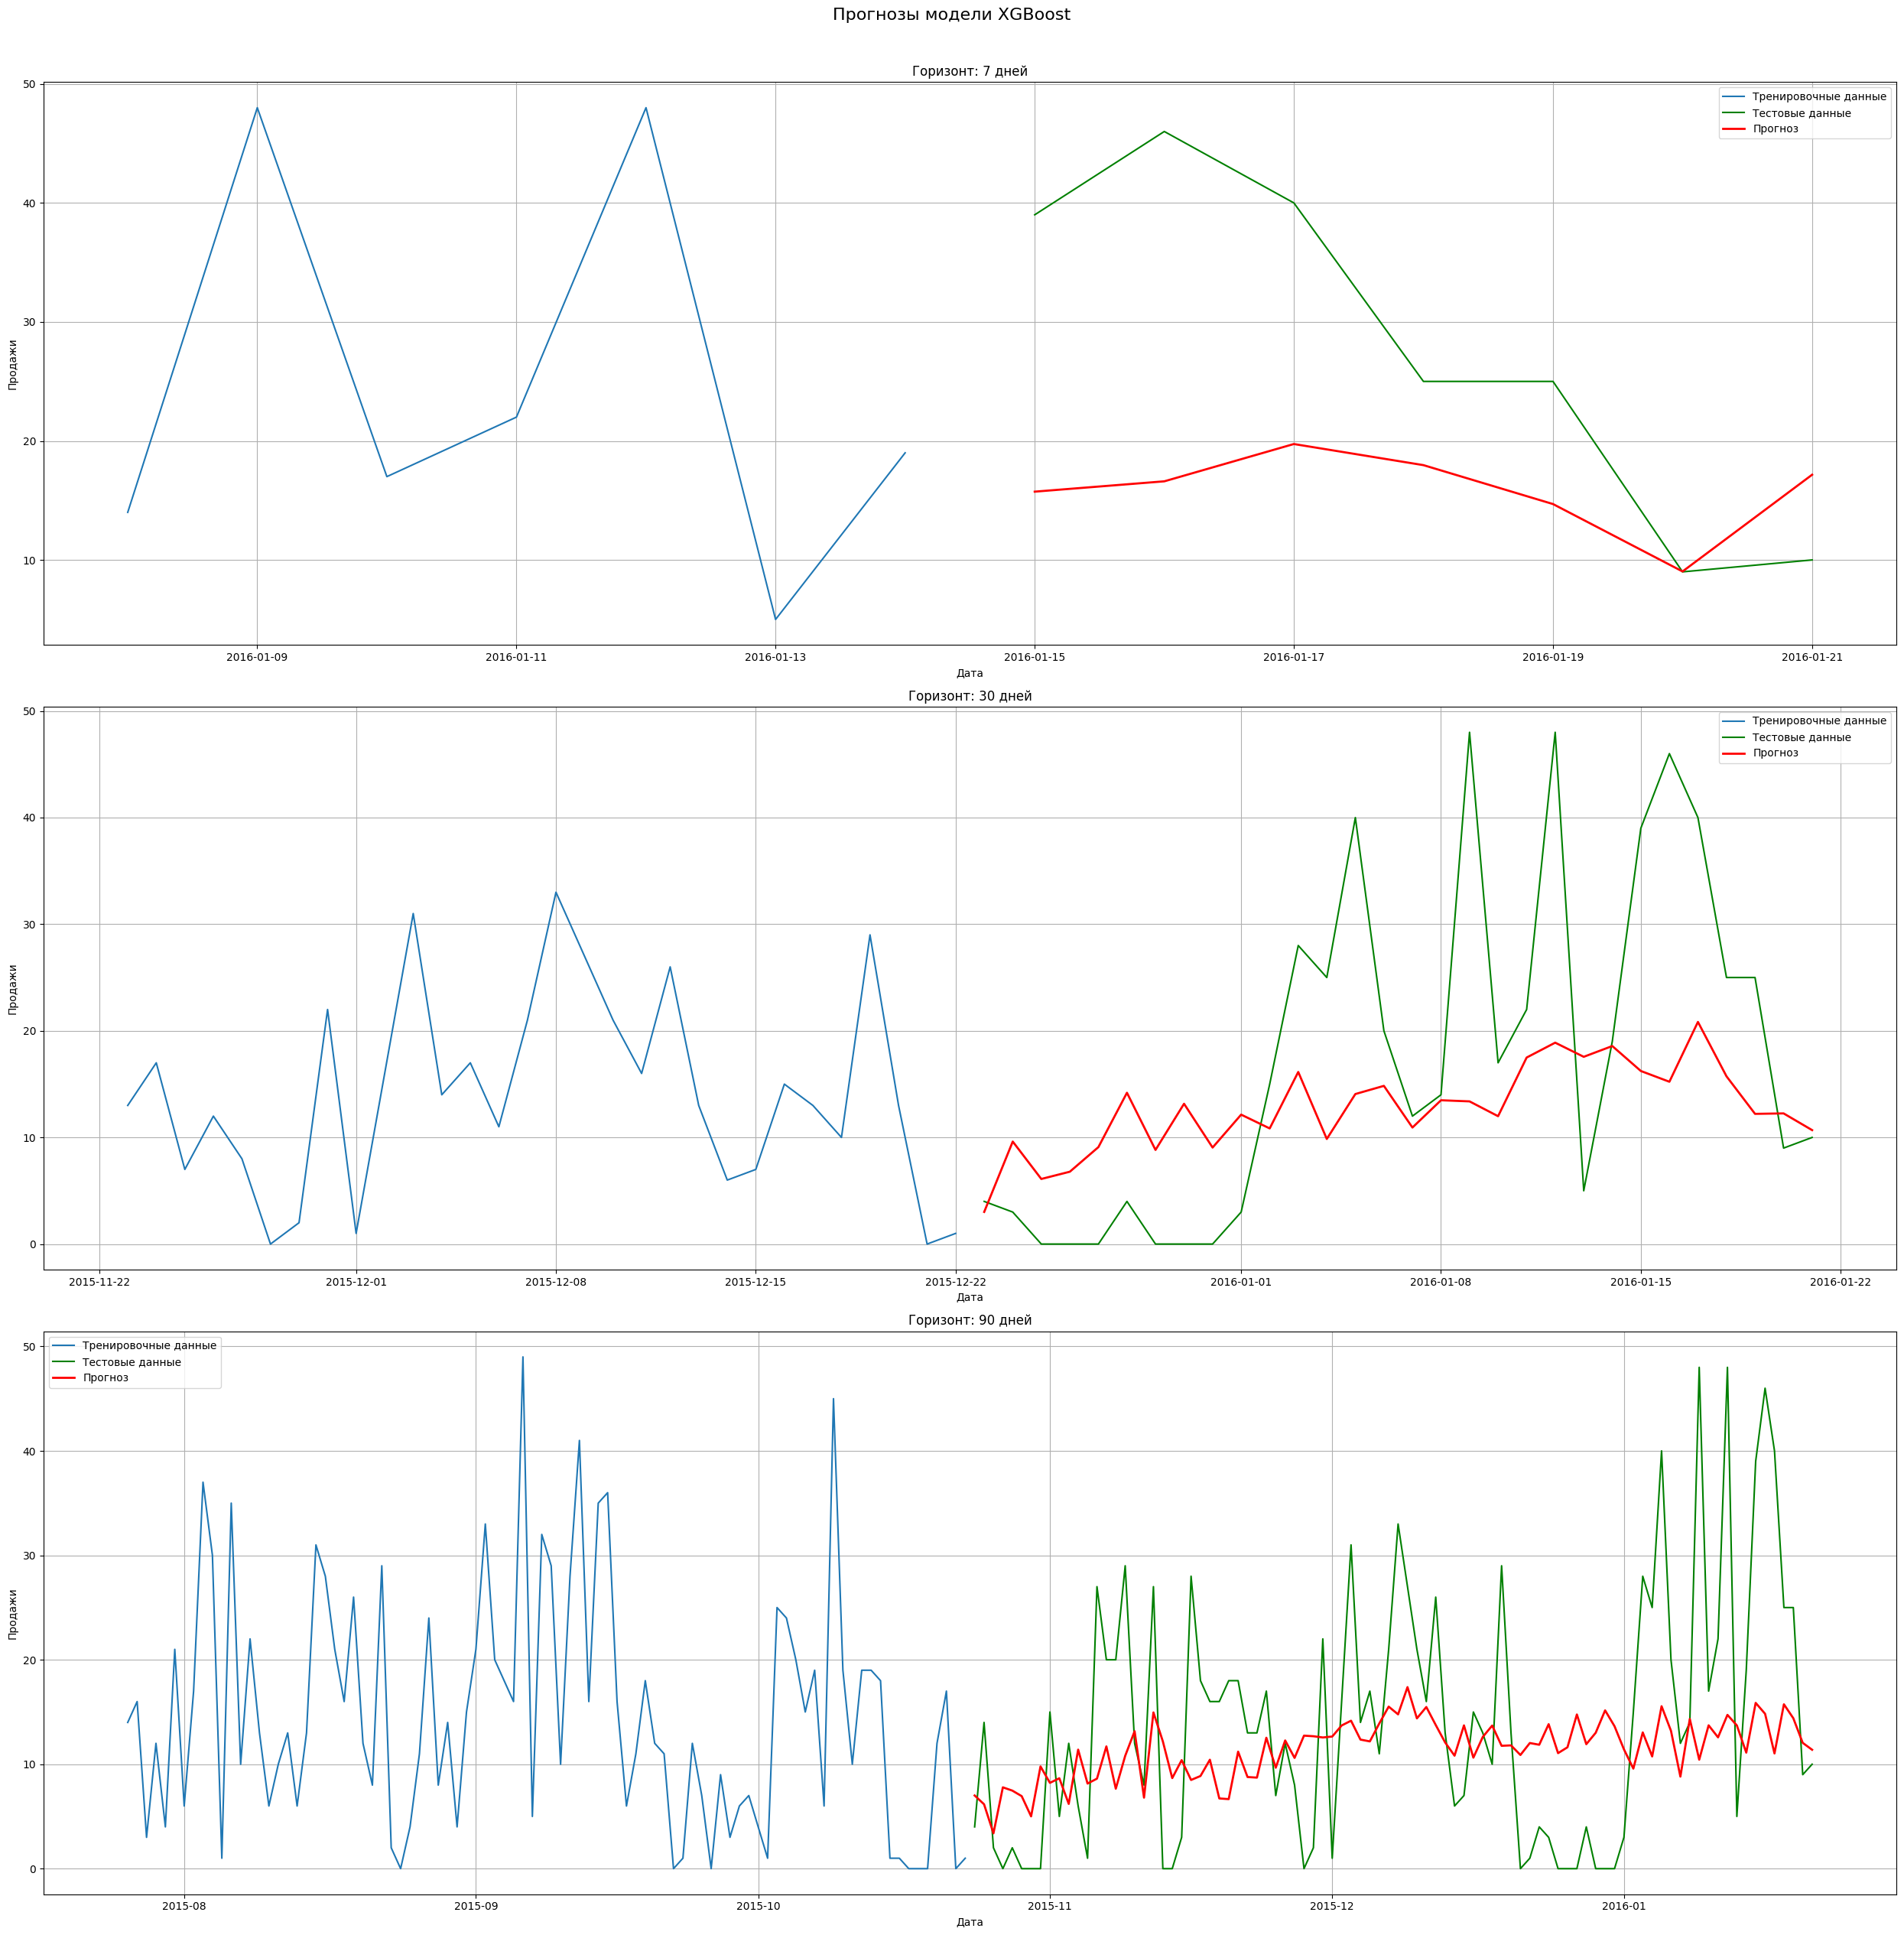

{('XGBoost', 7): {'MAE': 14.625841549464635,
                  'MAPE (%)': 45.31876055172183,
                  'RMSE': 17.710385251094223,
                  'SMAPE': 56.94896449229552},
 ('XGBoost', 30): {'MAE': 11.178325049082439,
                   'MAPE (%)': 207.15966275244435,
                   'RMSE': 14.682061614417098,
                   'SMAPE': 79.67595120324097},
 ('XGBoost', 90): {'MAE': 9.412859720653957,
                   'MAPE (%)': 215.50523444741262,
                   'RMSE': 12.083460986880095,
                   'SMAPE': 76.30374141327076}}
Product  STORE_1_555
{'trend': {'exists': True, 'p_value': 6.395767980922822e-205, 'slope': -0.018943023892974635}, 'seasonality': {'exists': False, 'period': 30, 'amplitude': 5.179722222222221}, 'stationarity': {'ADF': {'p_value': 0.3399617325286145, 'stationary': False}, 'KPSS': {'p_value': 0.01, 'stationary': False}}, 'outliers': {'count': 90, 'indices': [Timestamp('2011-04-02 00:00:00'), Timestamp('2011-05-06 00:00:00'), T

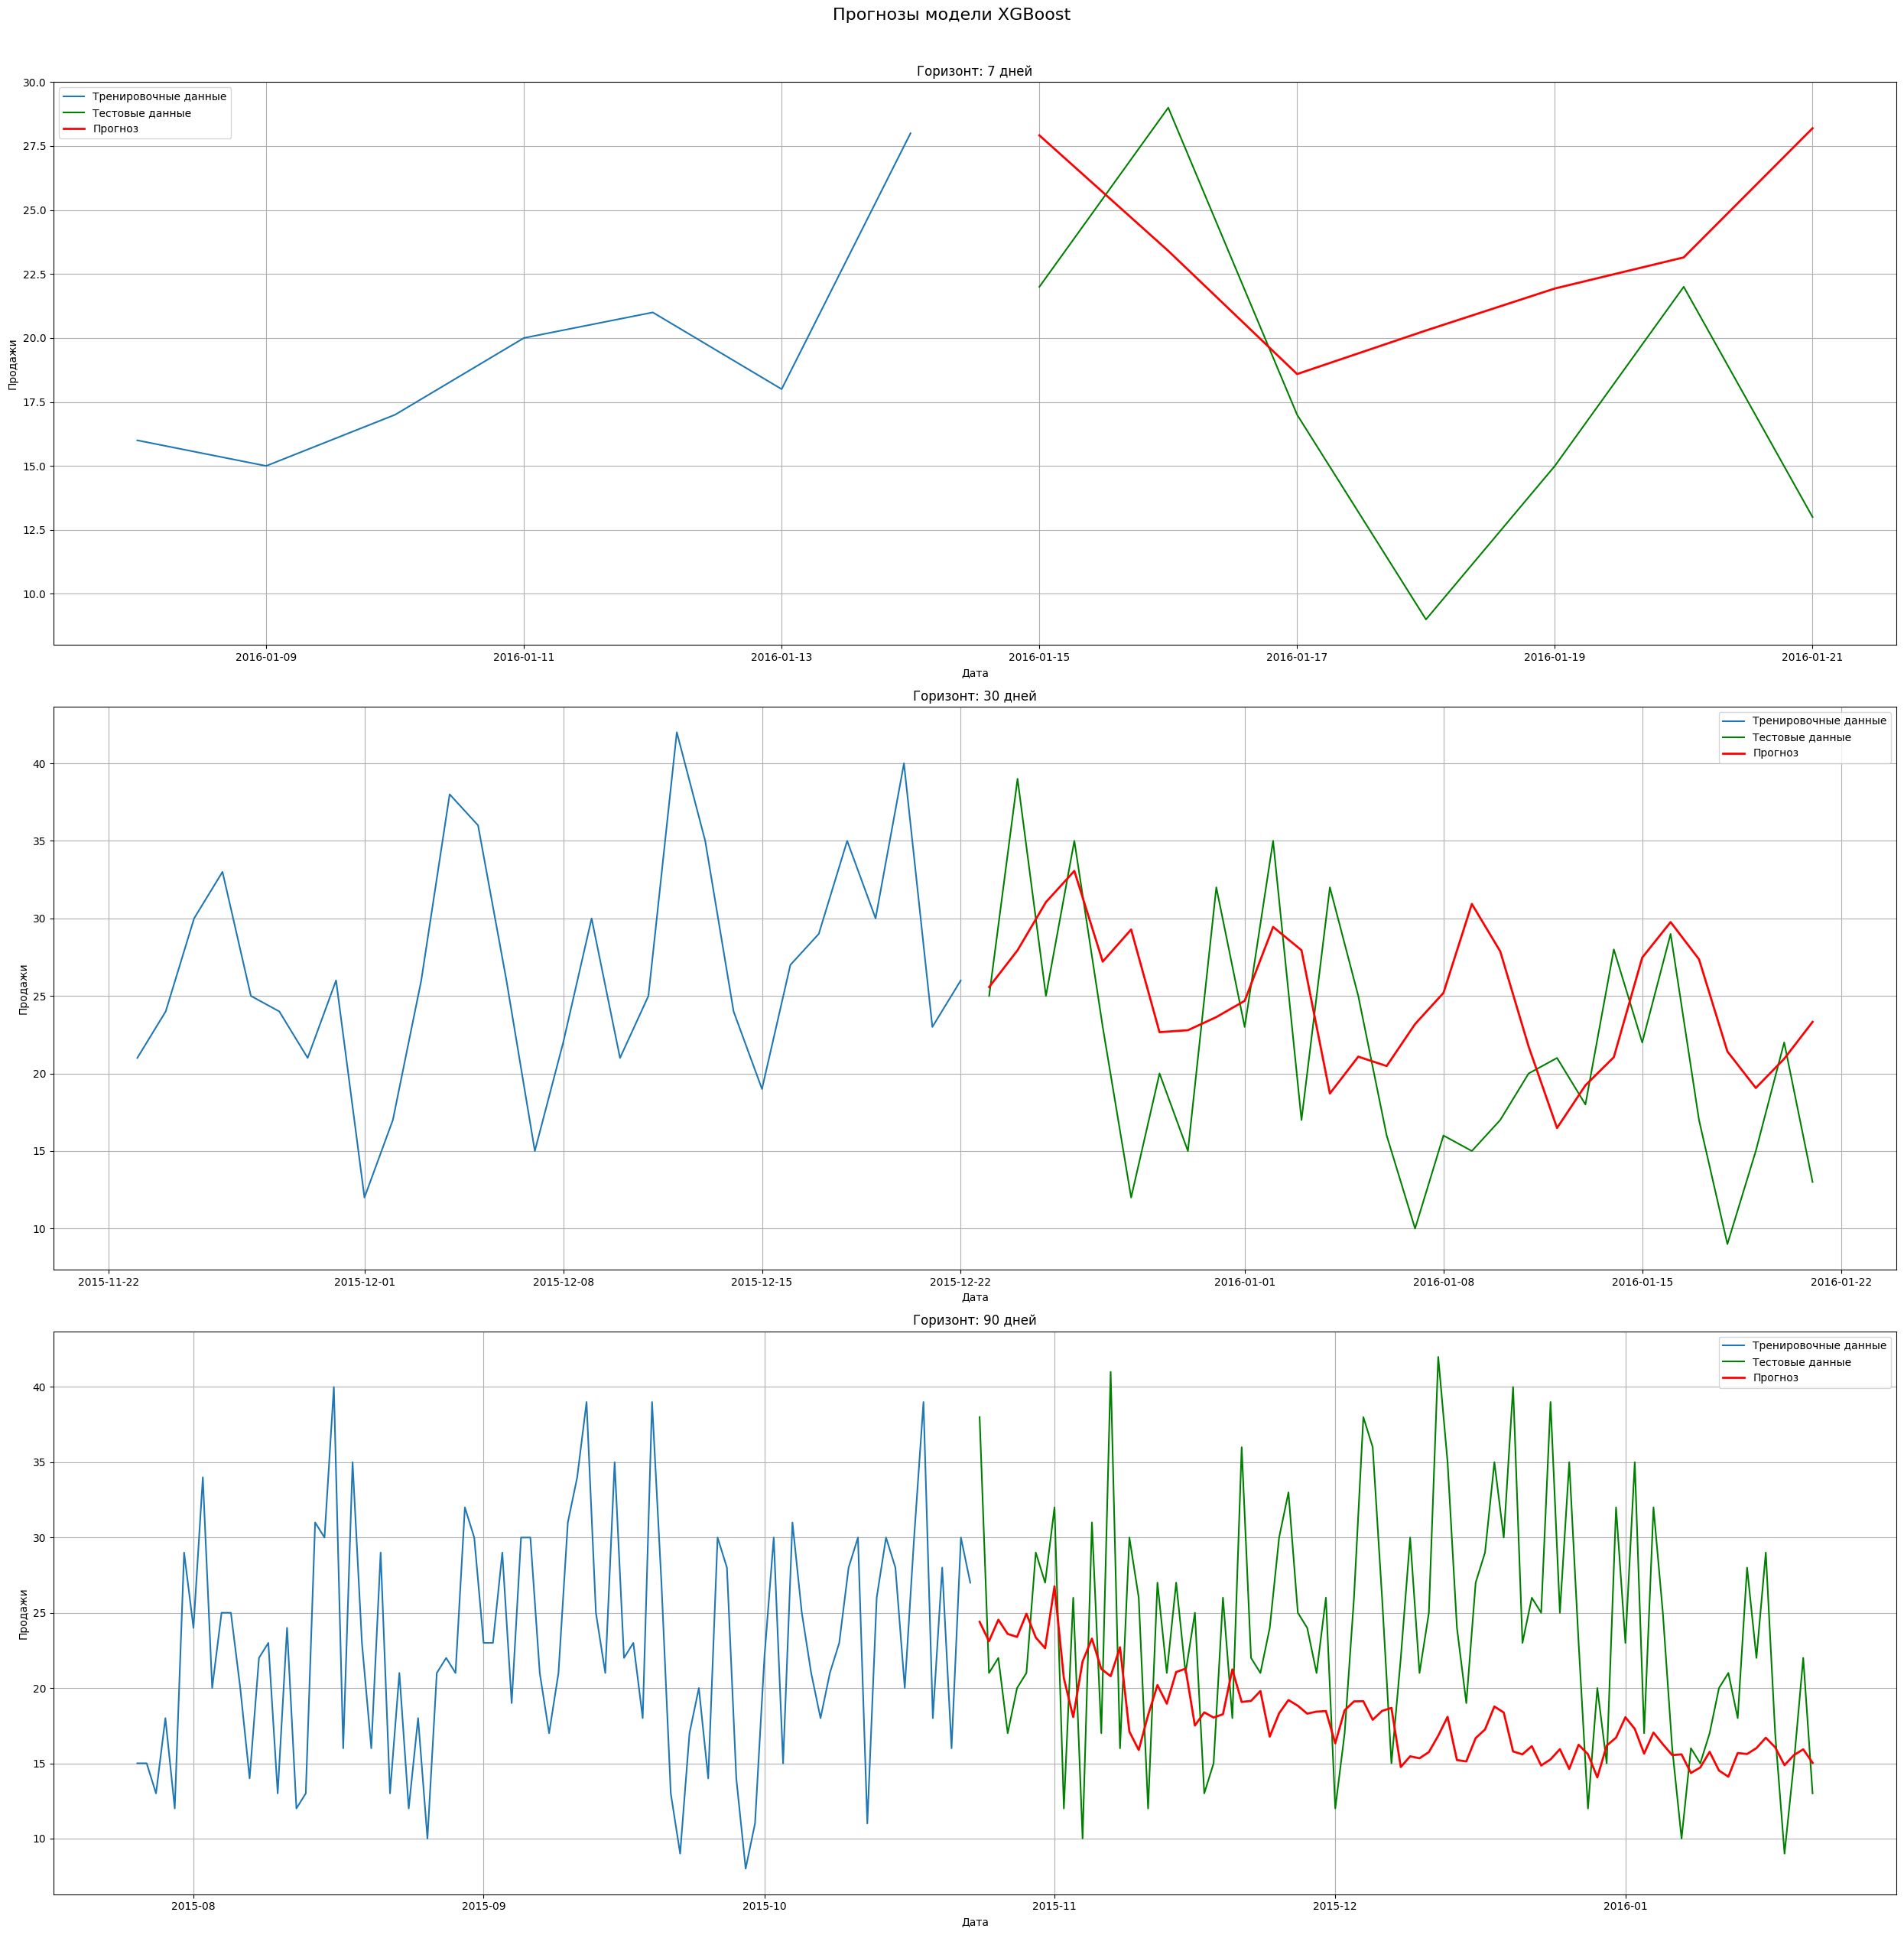

{('XGBoost', 7): {'MAE': 6.096461704799107,
                  'MAPE (%)': 41.24424011481886,
                  'RMSE': 7.660254599510189,
                  'SMAPE': 30.630494108005834},
 ('XGBoost', 30): {'MAE': 6.573738797505697,
                   'MAPE (%)': 36.041788238787724,
                   'RMSE': 8.048842529067066,
                   'SMAPE': 29.35602640542252},
 ('XGBoost', 90): {'MAE': 8.505073568556044,
                   'MAPE (%)': 31.65253761538534,
                   'RMSE': 10.502673776331351,
                   'SMAPE': 37.18108061039131}}
Product  STORE_1_584
{'trend': {'exists': True, 'p_value': 4.513954206402138e-64, 'slope': -0.002276647325335812}, 'seasonality': {'exists': False, 'period': 30, 'amplitude': 1.7538888888888888}, 'stationarity': {'ADF': {'p_value': 0.0002447760026841589, 'stationary': True}, 'KPSS': {'p_value': 0.01, 'stationary': False}}, 'outliers': {'count': 80, 'indices': [Timestamp('2011-01-29 00:00:00'), Timestamp('2011-01-30 00:00:00'), Tim

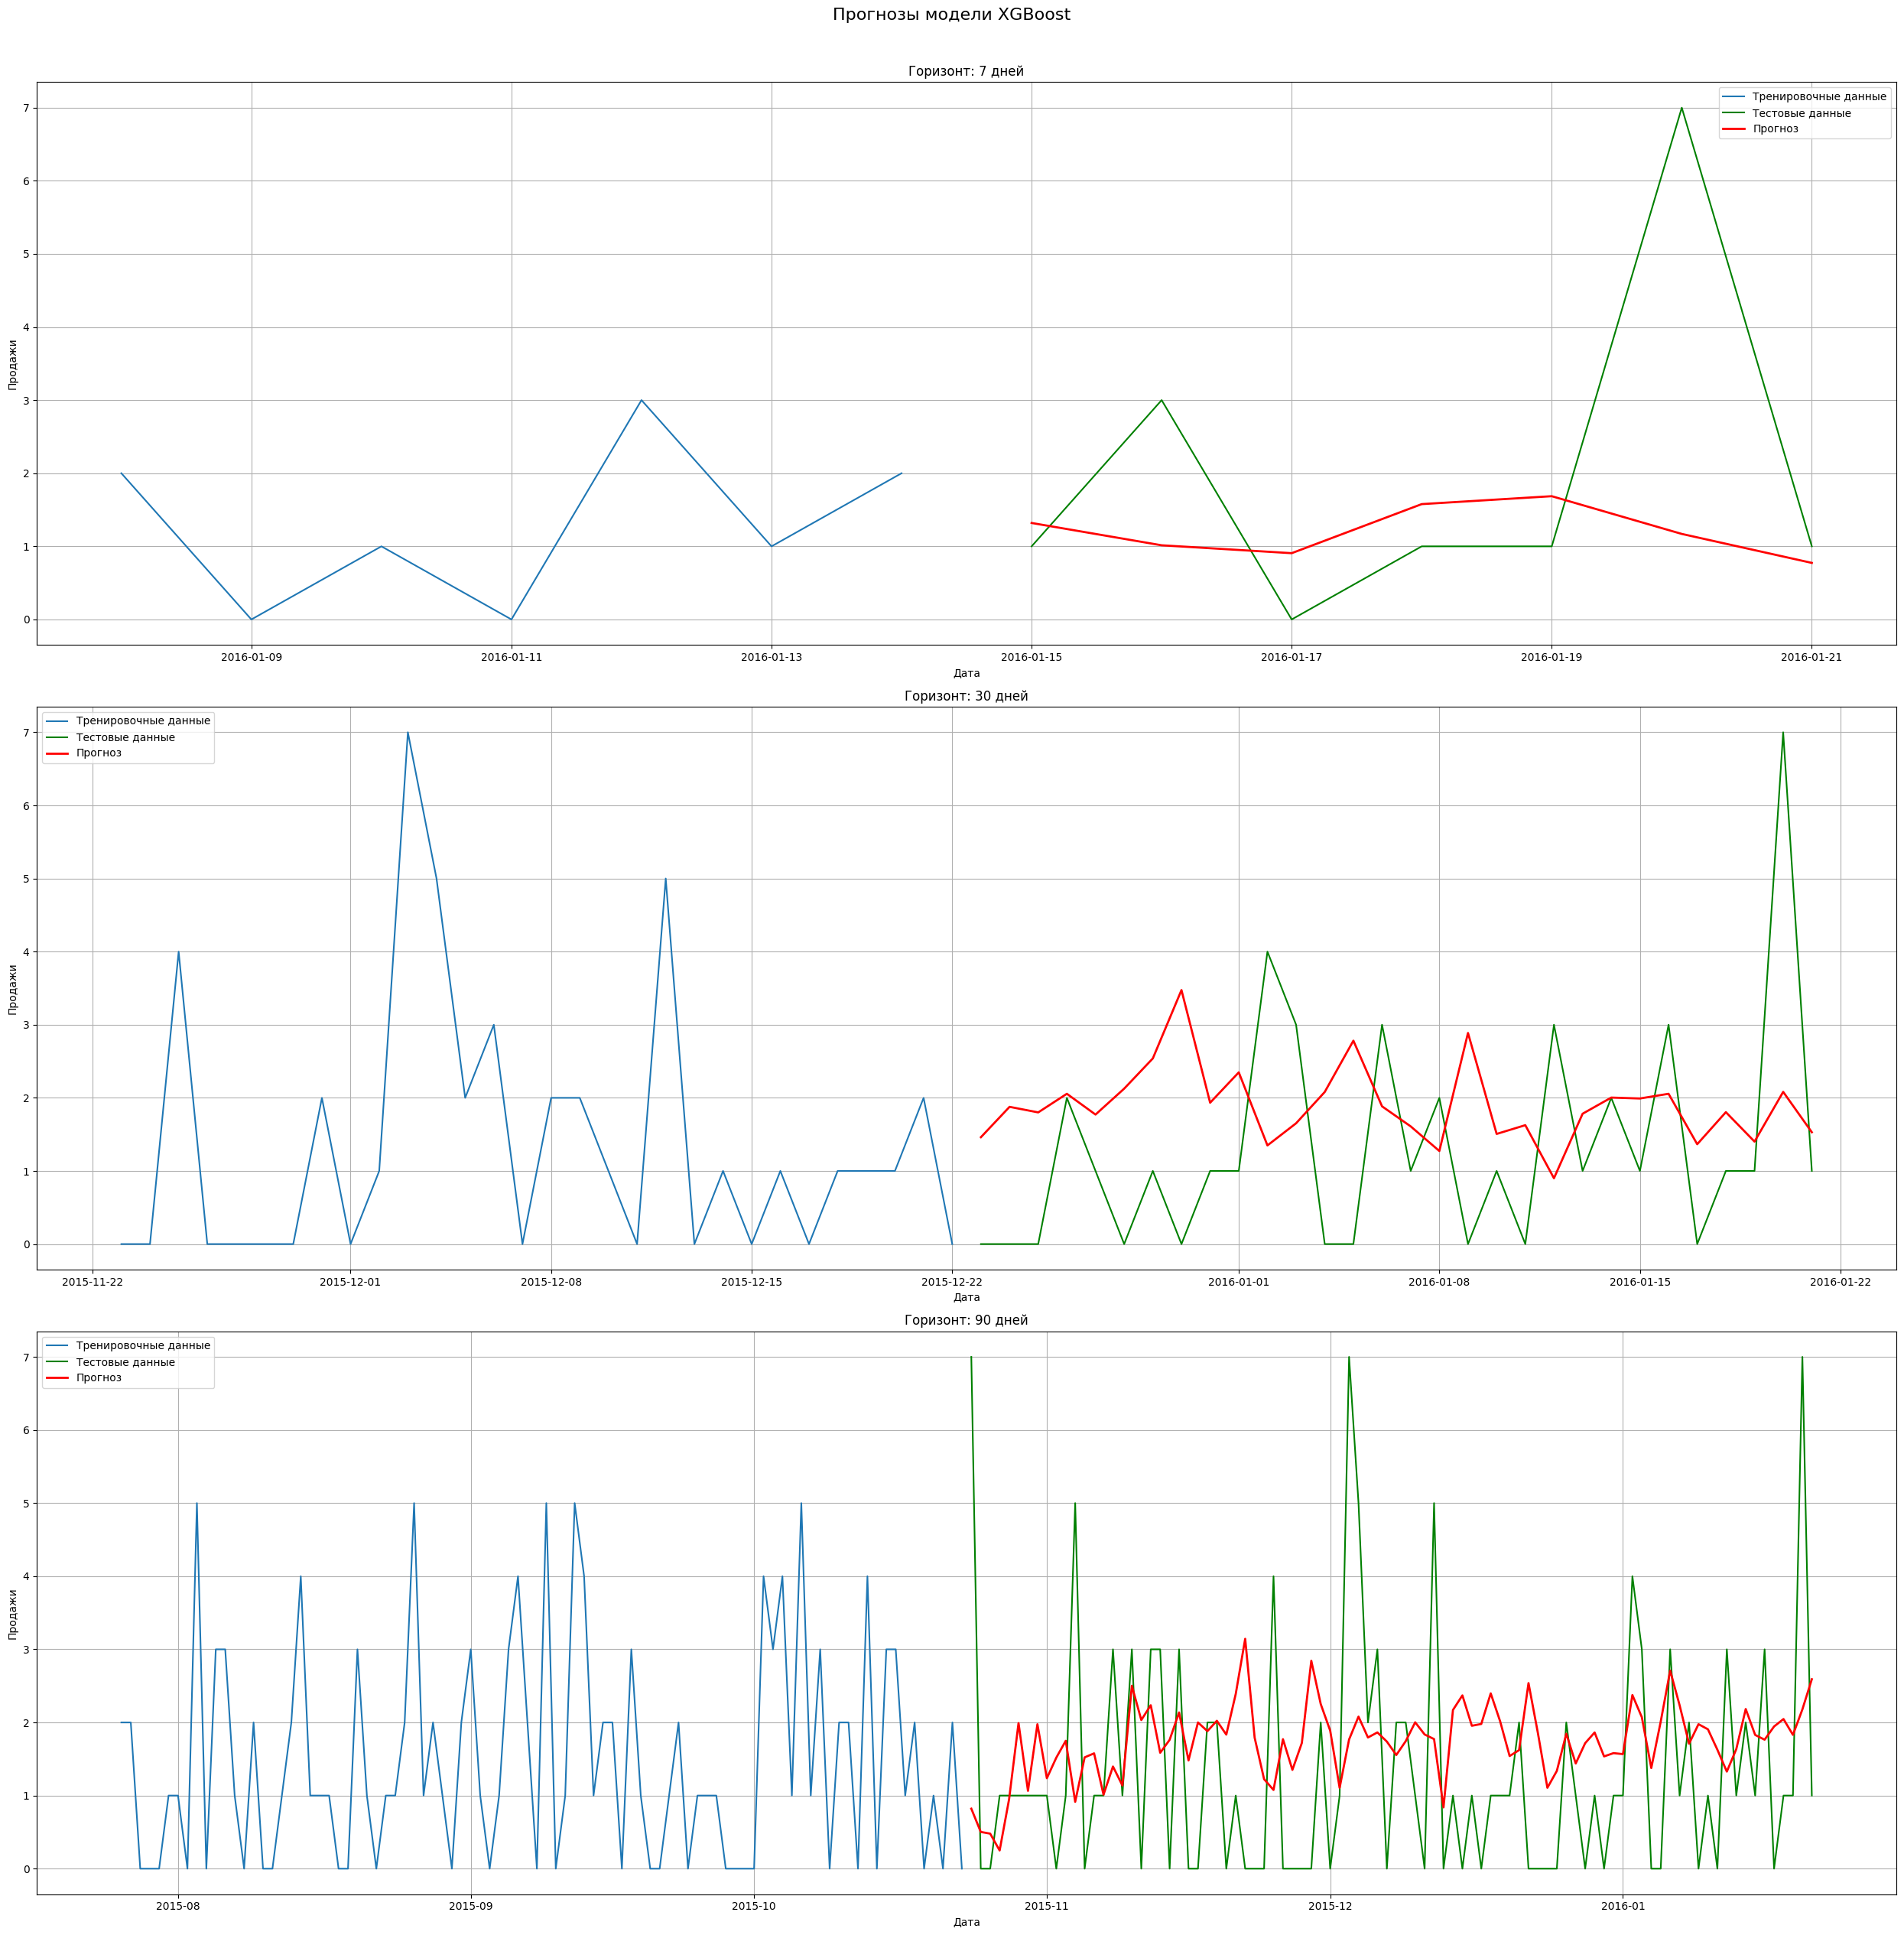

{('XGBoost', 7): {'MAE': 1.793200237410409,
                  'MAPE (%)': 43.07484669344766,
                  'RMSE': 2.8739472389141754,
                  'SMAPE': 63.99082675257131},
 ('XGBoost', 30): {'MAE': 1.259445345401764,
                   'MAPE (%)': 61.095118668344284,
                   'RMSE': 1.7848588088556838,
                   'SMAPE': 53.45668803680809},
 ('XGBoost', 90): {'MAE': 1.2164437823825411,
                   'MAPE (%)': 52.3949552917922,
                   'RMSE': 1.8250267039877819,
                   'SMAPE': 52.698708437701654}}
Product  STORE_1_586
{'trend': {'exists': True, 'p_value': 6.785990445918742e-201, 'slope': -0.022840852251528338}, 'seasonality': {'exists': False, 'period': 30, 'amplitude': 6.234745762711864}, 'stationarity': {'ADF': {'p_value': 0.39308969831696033, 'stationary': False}, 'KPSS': {'p_value': 0.01, 'stationary': False}}, 'outliers': {'count': 88, 'indices': [Timestamp('2011-02-13 00:00:00'), Timestamp('2011-06-07 00:00:00'), Ti

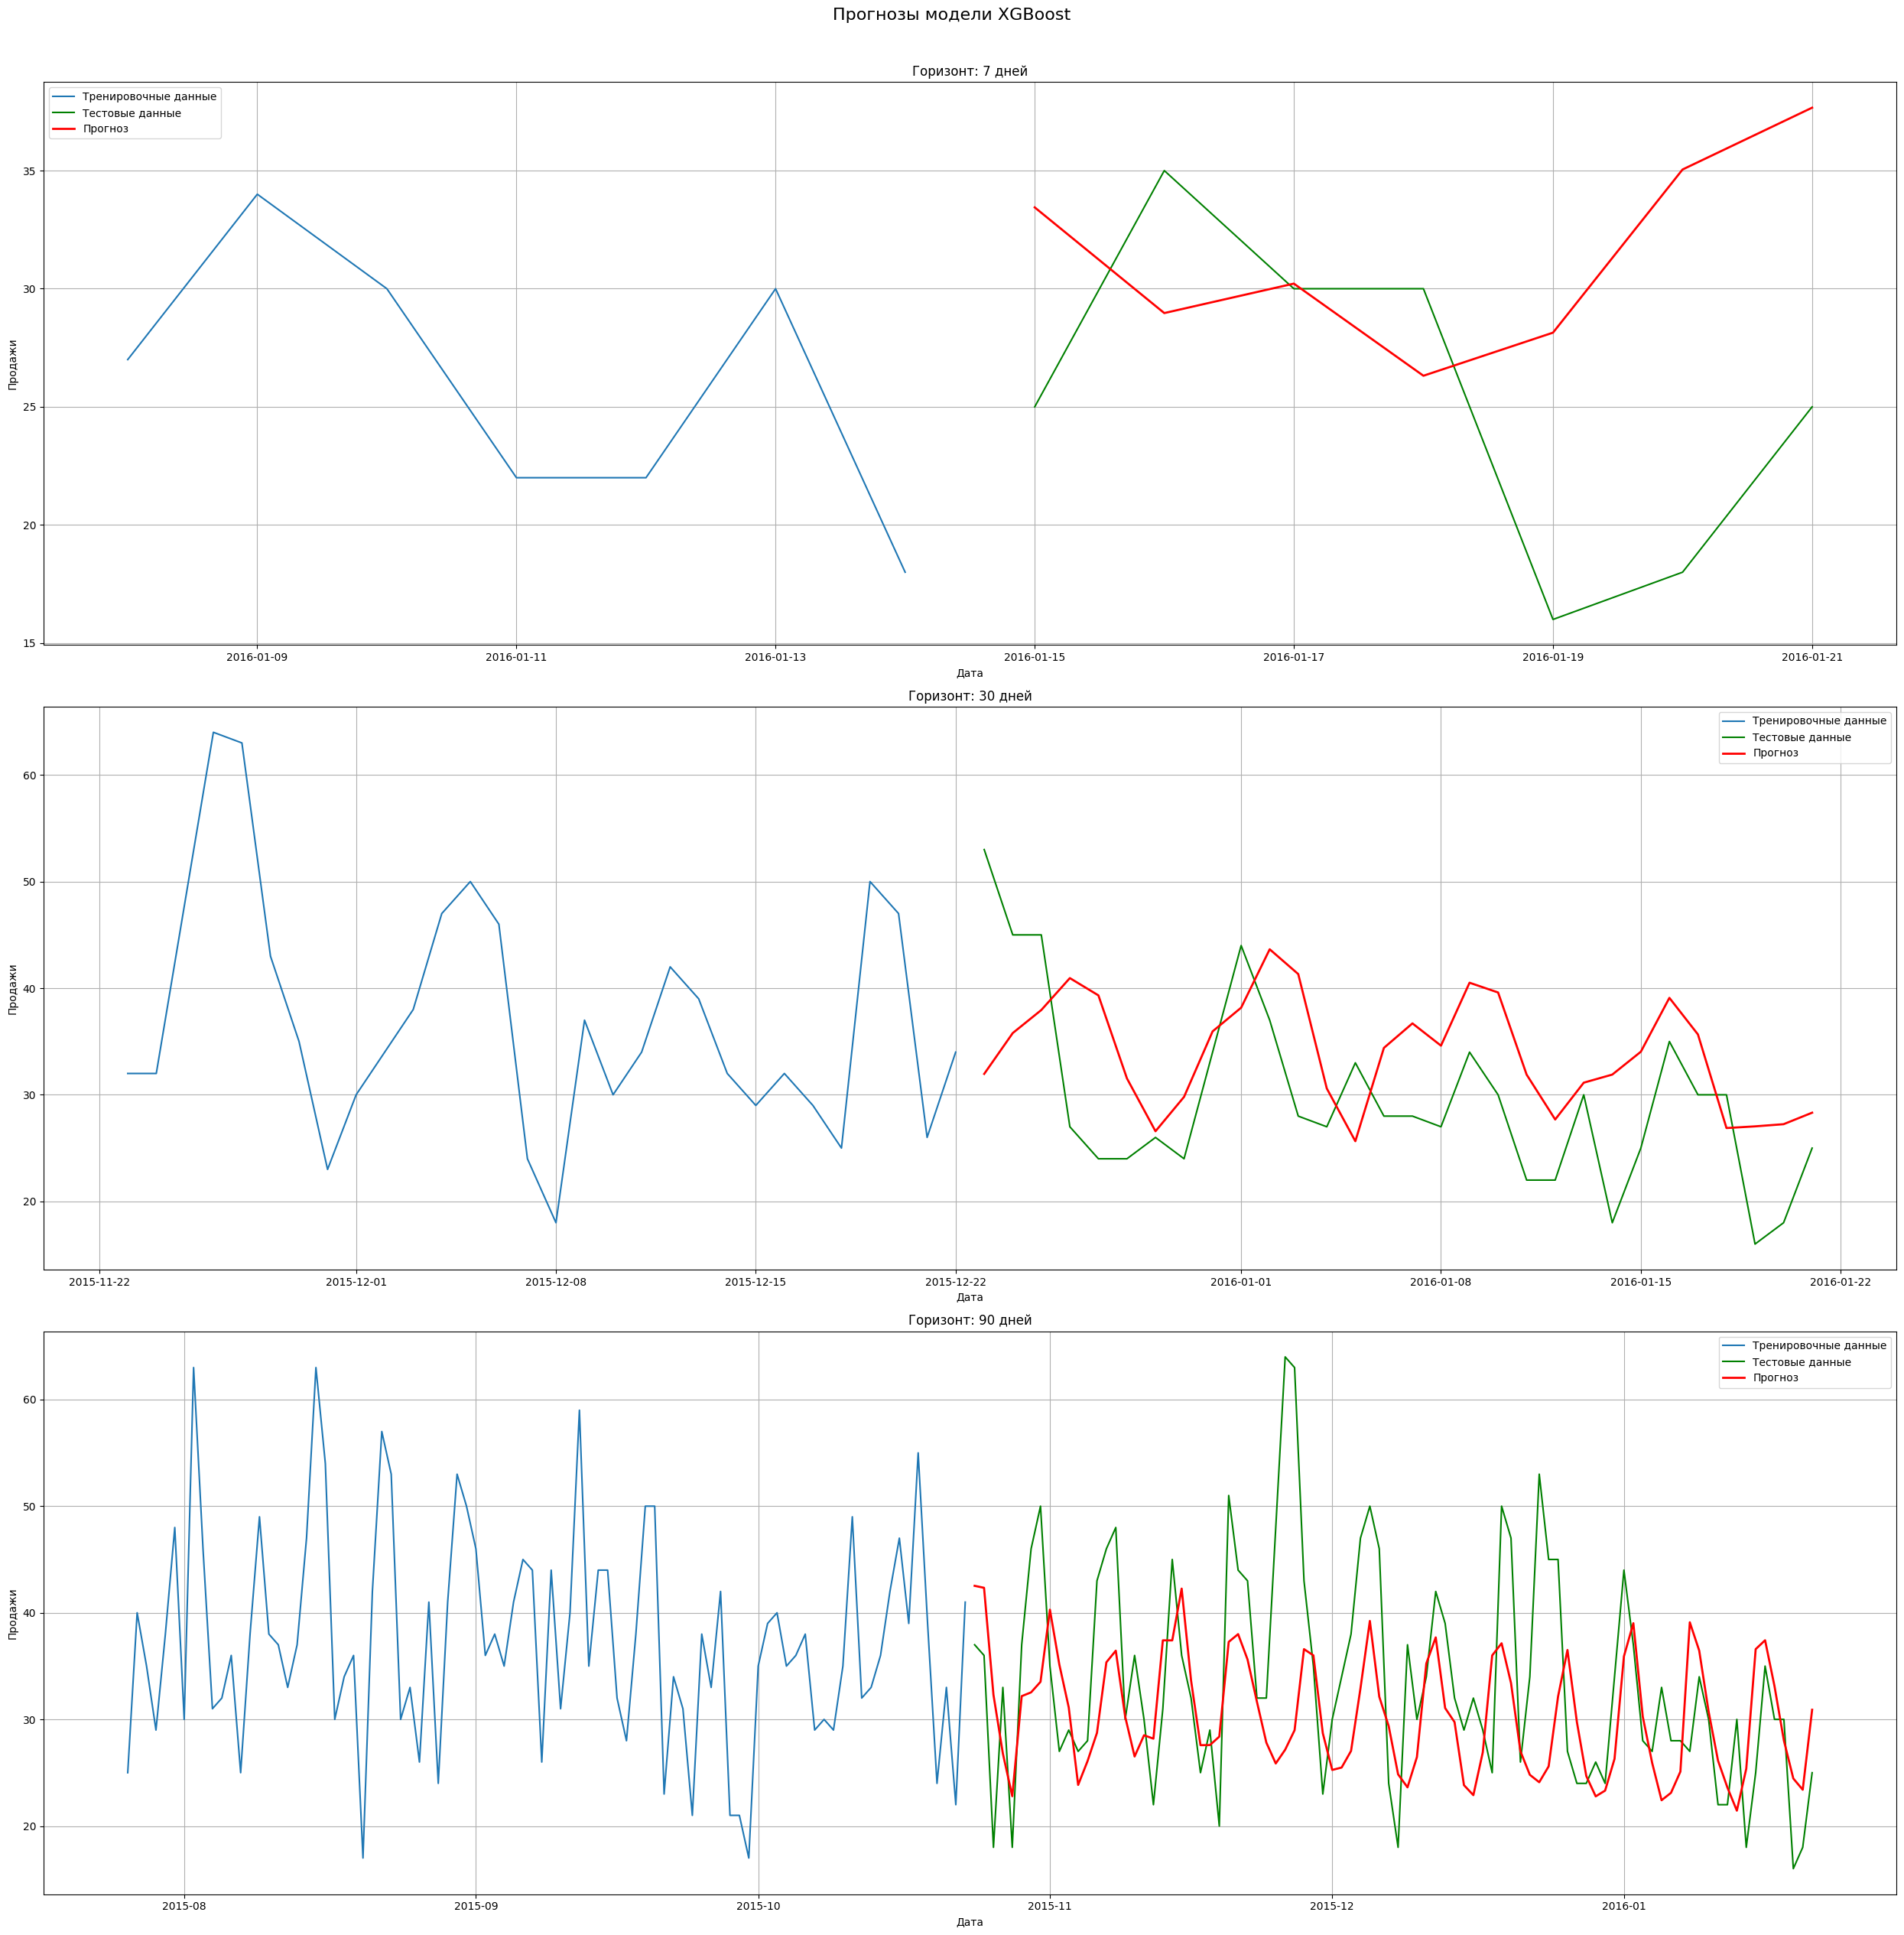

{('XGBoost', 7): {'MAE': 8.39876583644322,
                  'MAPE (%)': 37.23374303121819,
                  'RMSE': 9.598997500991388,
                  'SMAPE': 30.138641885873476},
 ('XGBoost', 30): {'MAE': 7.231602223714193,
                   'MAPE (%)': 25.291968315973705,
                   'RMSE': 8.547718740051215,
                   'SMAPE': 22.66935714332194},
 ('XGBoost', 90): {'MAE': 7.814881769816081,
                   'MAPE (%)': 21.205074831157123,
                   'RMSE': 10.49306609951746,
                   'SMAPE': 22.88347808390521}}
Product  STORE_1_587
{'trend': {'exists': True, 'p_value': 1.4103420515133915e-10, 'slope': -0.004808677497947526}, 'seasonality': {'exists': False, 'period': 30, 'amplitude': 5.240145951035782}, 'stationarity': {'ADF': {'p_value': 0.0031774703990520604, 'stationary': True}, 'KPSS': {'p_value': 0.01, 'stationary': False}}, 'outliers': {'count': 89, 'indices': [Timestamp('2011-01-29 00:00:00'), Timestamp('2011-01-30 00:00:00'), Time

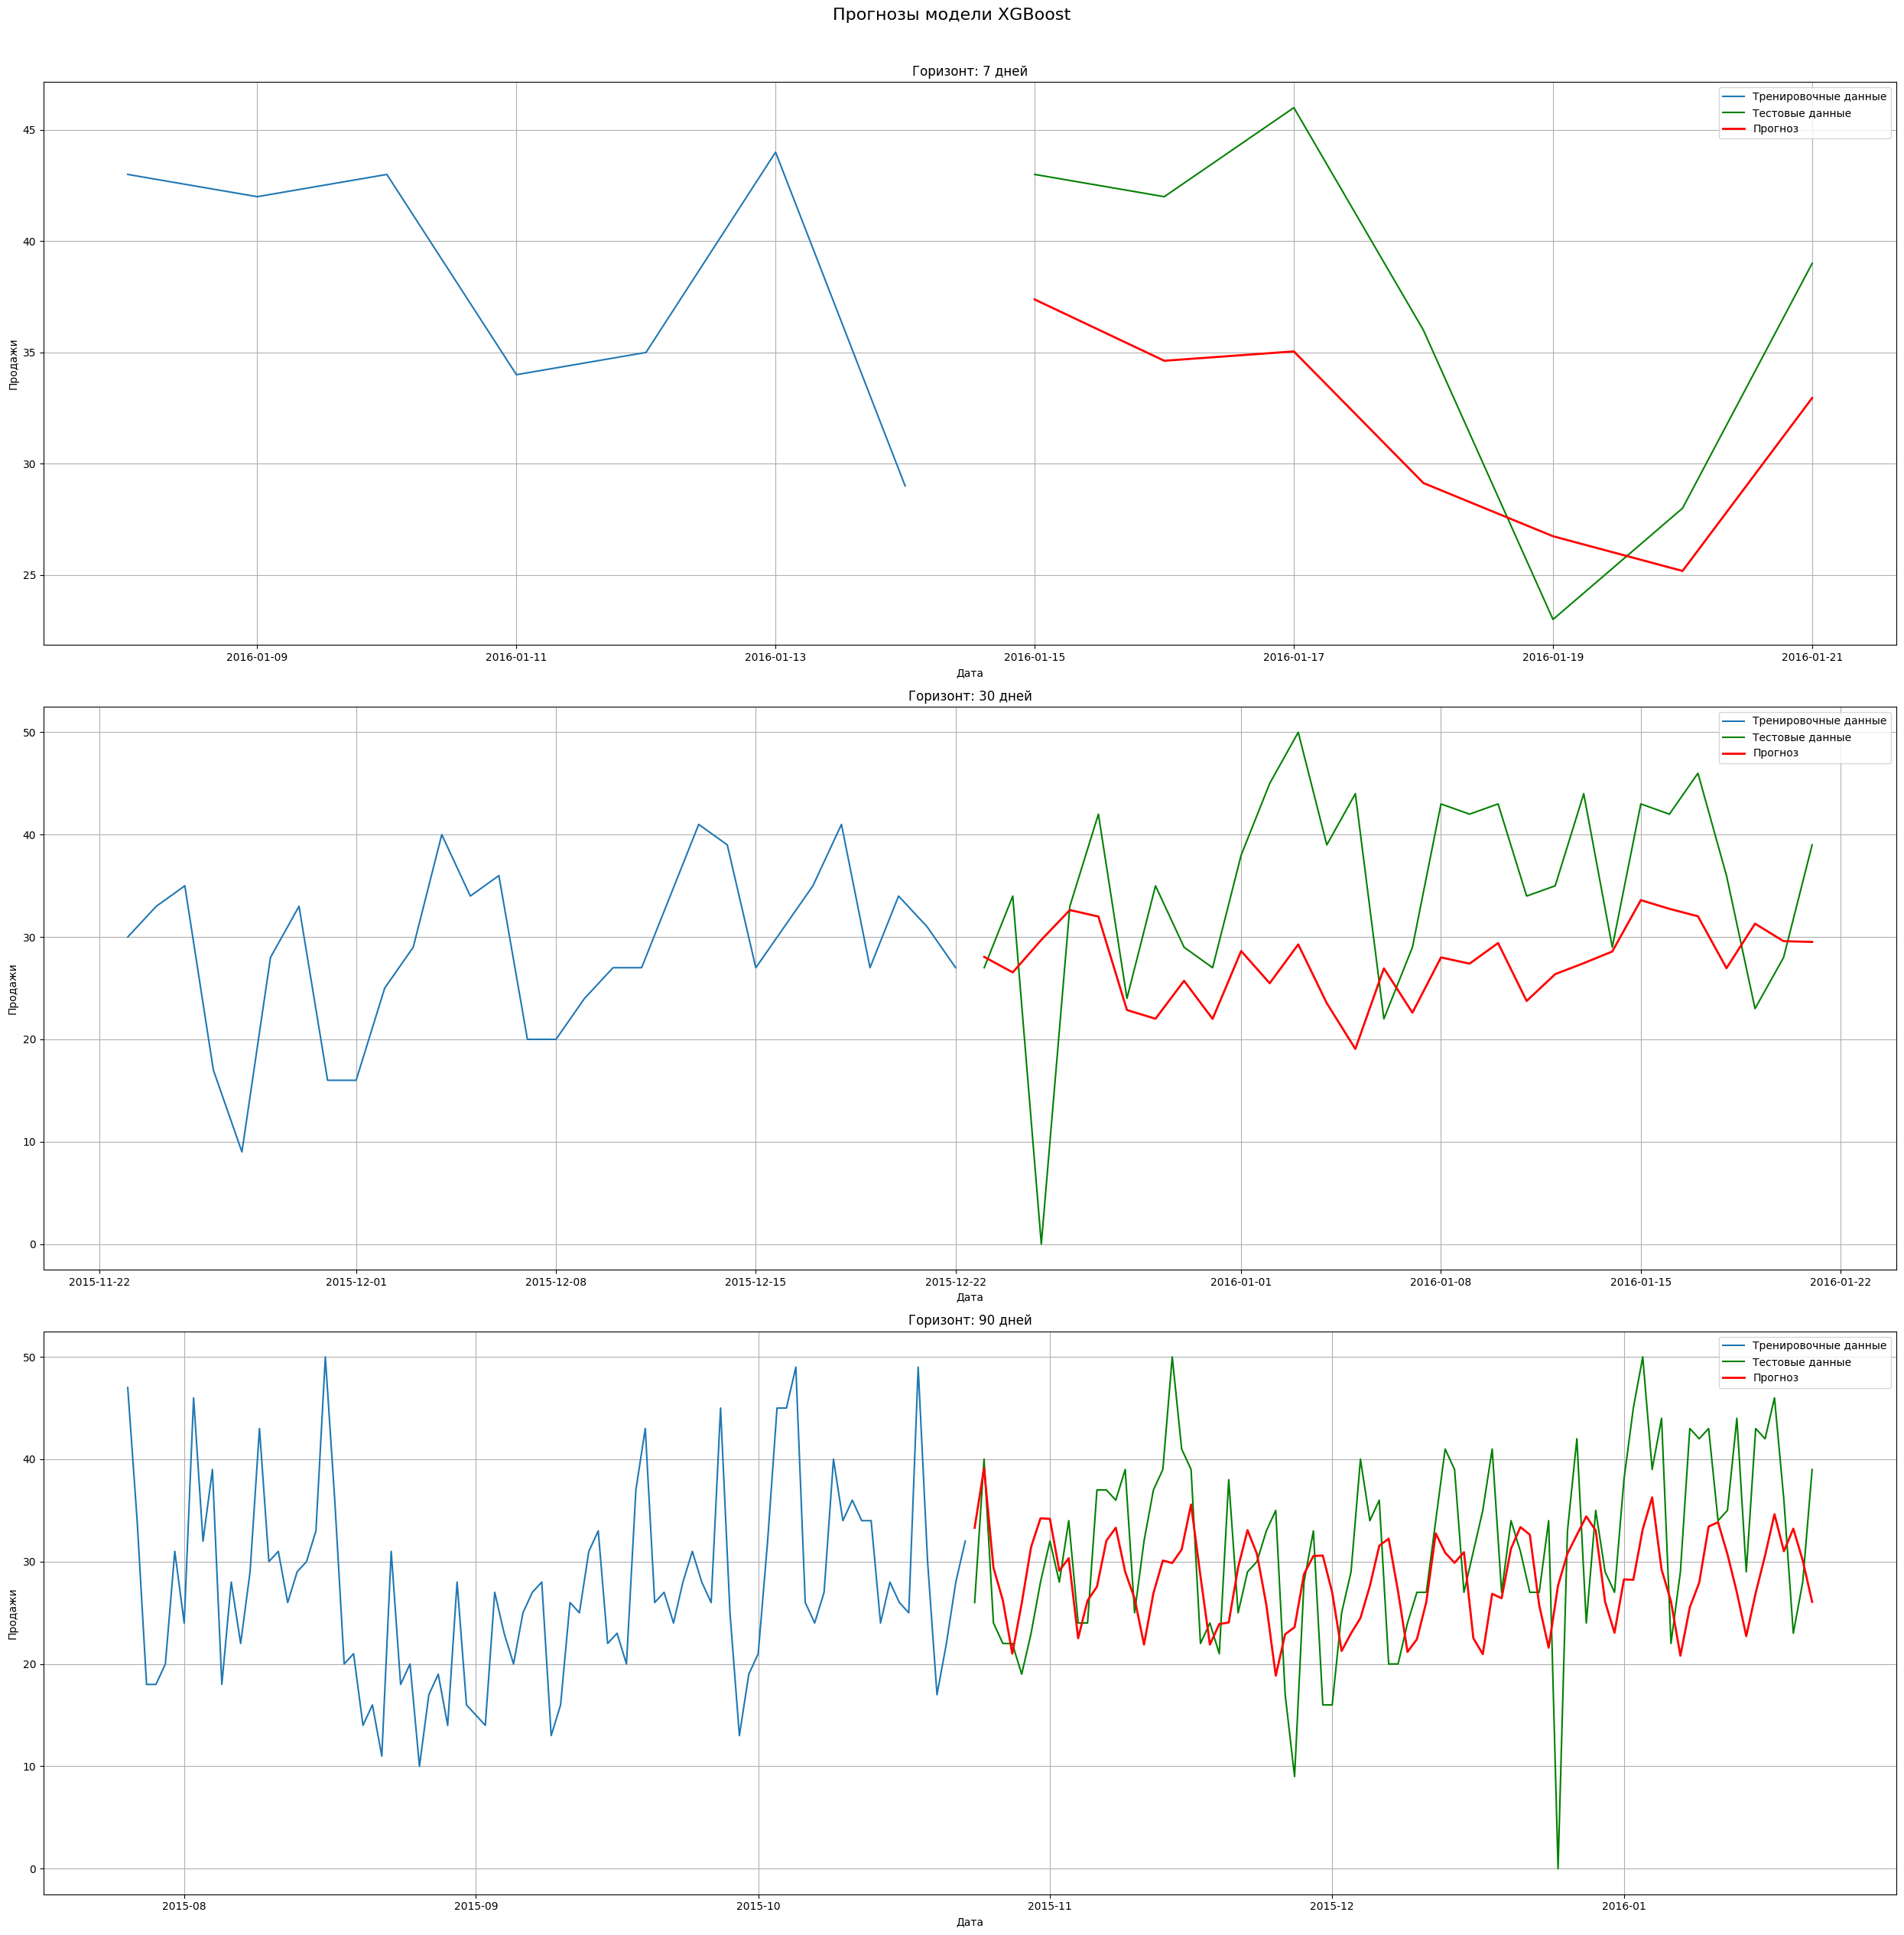

{('XGBoost', 7): {'MAE': 6.917959213256836,
                  'MAPE (%)': 17.633322727180705,
                  'RMSE': 7.469445760257968,
                  'SMAPE': 19.2870015137414},
 ('XGBoost', 30): {'MAE': 11.081052207946778,
                   'MAPE (%)': 121.22213023938792,
                   'RMSE': 13.206019602520692,
                   'SMAPE': 36.541228541077224},
 ('XGBoost', 90): {'MAE': 7.774864133199056,
                   'MAPE (%)': 52.87985071382445,
                   'RMSE': 9.610658964503521,
                   'SMAPE': 26.395960042017997}}
Product  STORE_1_714


/content/TimeSeries/Processor.py:62: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.mask(outliers, rolling_median)
/content/TimeSeries/Processor.py:62: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.mask(outliers, rolling_median)


{'trend': {'exists': True, 'p_value': 1.2191213308586666e-74, 'slope': -0.011049120305103627}, 'seasonality': {'exists': False, 'period': 30, 'amplitude': 3.905353107344633}, 'stationarity': {'ADF': {'p_value': 0.01098312417922318, 'stationary': True}, 'KPSS': {'p_value': 0.01, 'stationary': False}}, 'outliers': {'count': 91, 'indices': [Timestamp('2011-03-05 00:00:00'), Timestamp('2011-04-10 00:00:00'), Timestamp('2011-04-30 00:00:00'), Timestamp('2011-05-12 00:00:00'), Timestamp('2011-05-22 00:00:00'), Timestamp('2011-05-30 00:00:00'), Timestamp('2011-06-03 00:00:00'), Timestamp('2011-06-04 00:00:00'), Timestamp('2011-06-08 00:00:00'), Timestamp('2011-07-01 00:00:00'), Timestamp('2011-07-02 00:00:00'), Timestamp('2011-07-03 00:00:00'), Timestamp('2011-07-09 00:00:00'), Timestamp('2011-07-17 00:00:00'), Timestamp('2011-07-18 00:00:00'), Timestamp('2011-07-19 00:00:00'), Timestamp('2011-07-20 00:00:00'), Timestamp('2011-07-21 00:00:00'), Timestamp('2011-07-23 00:00:00'), Timestamp('201

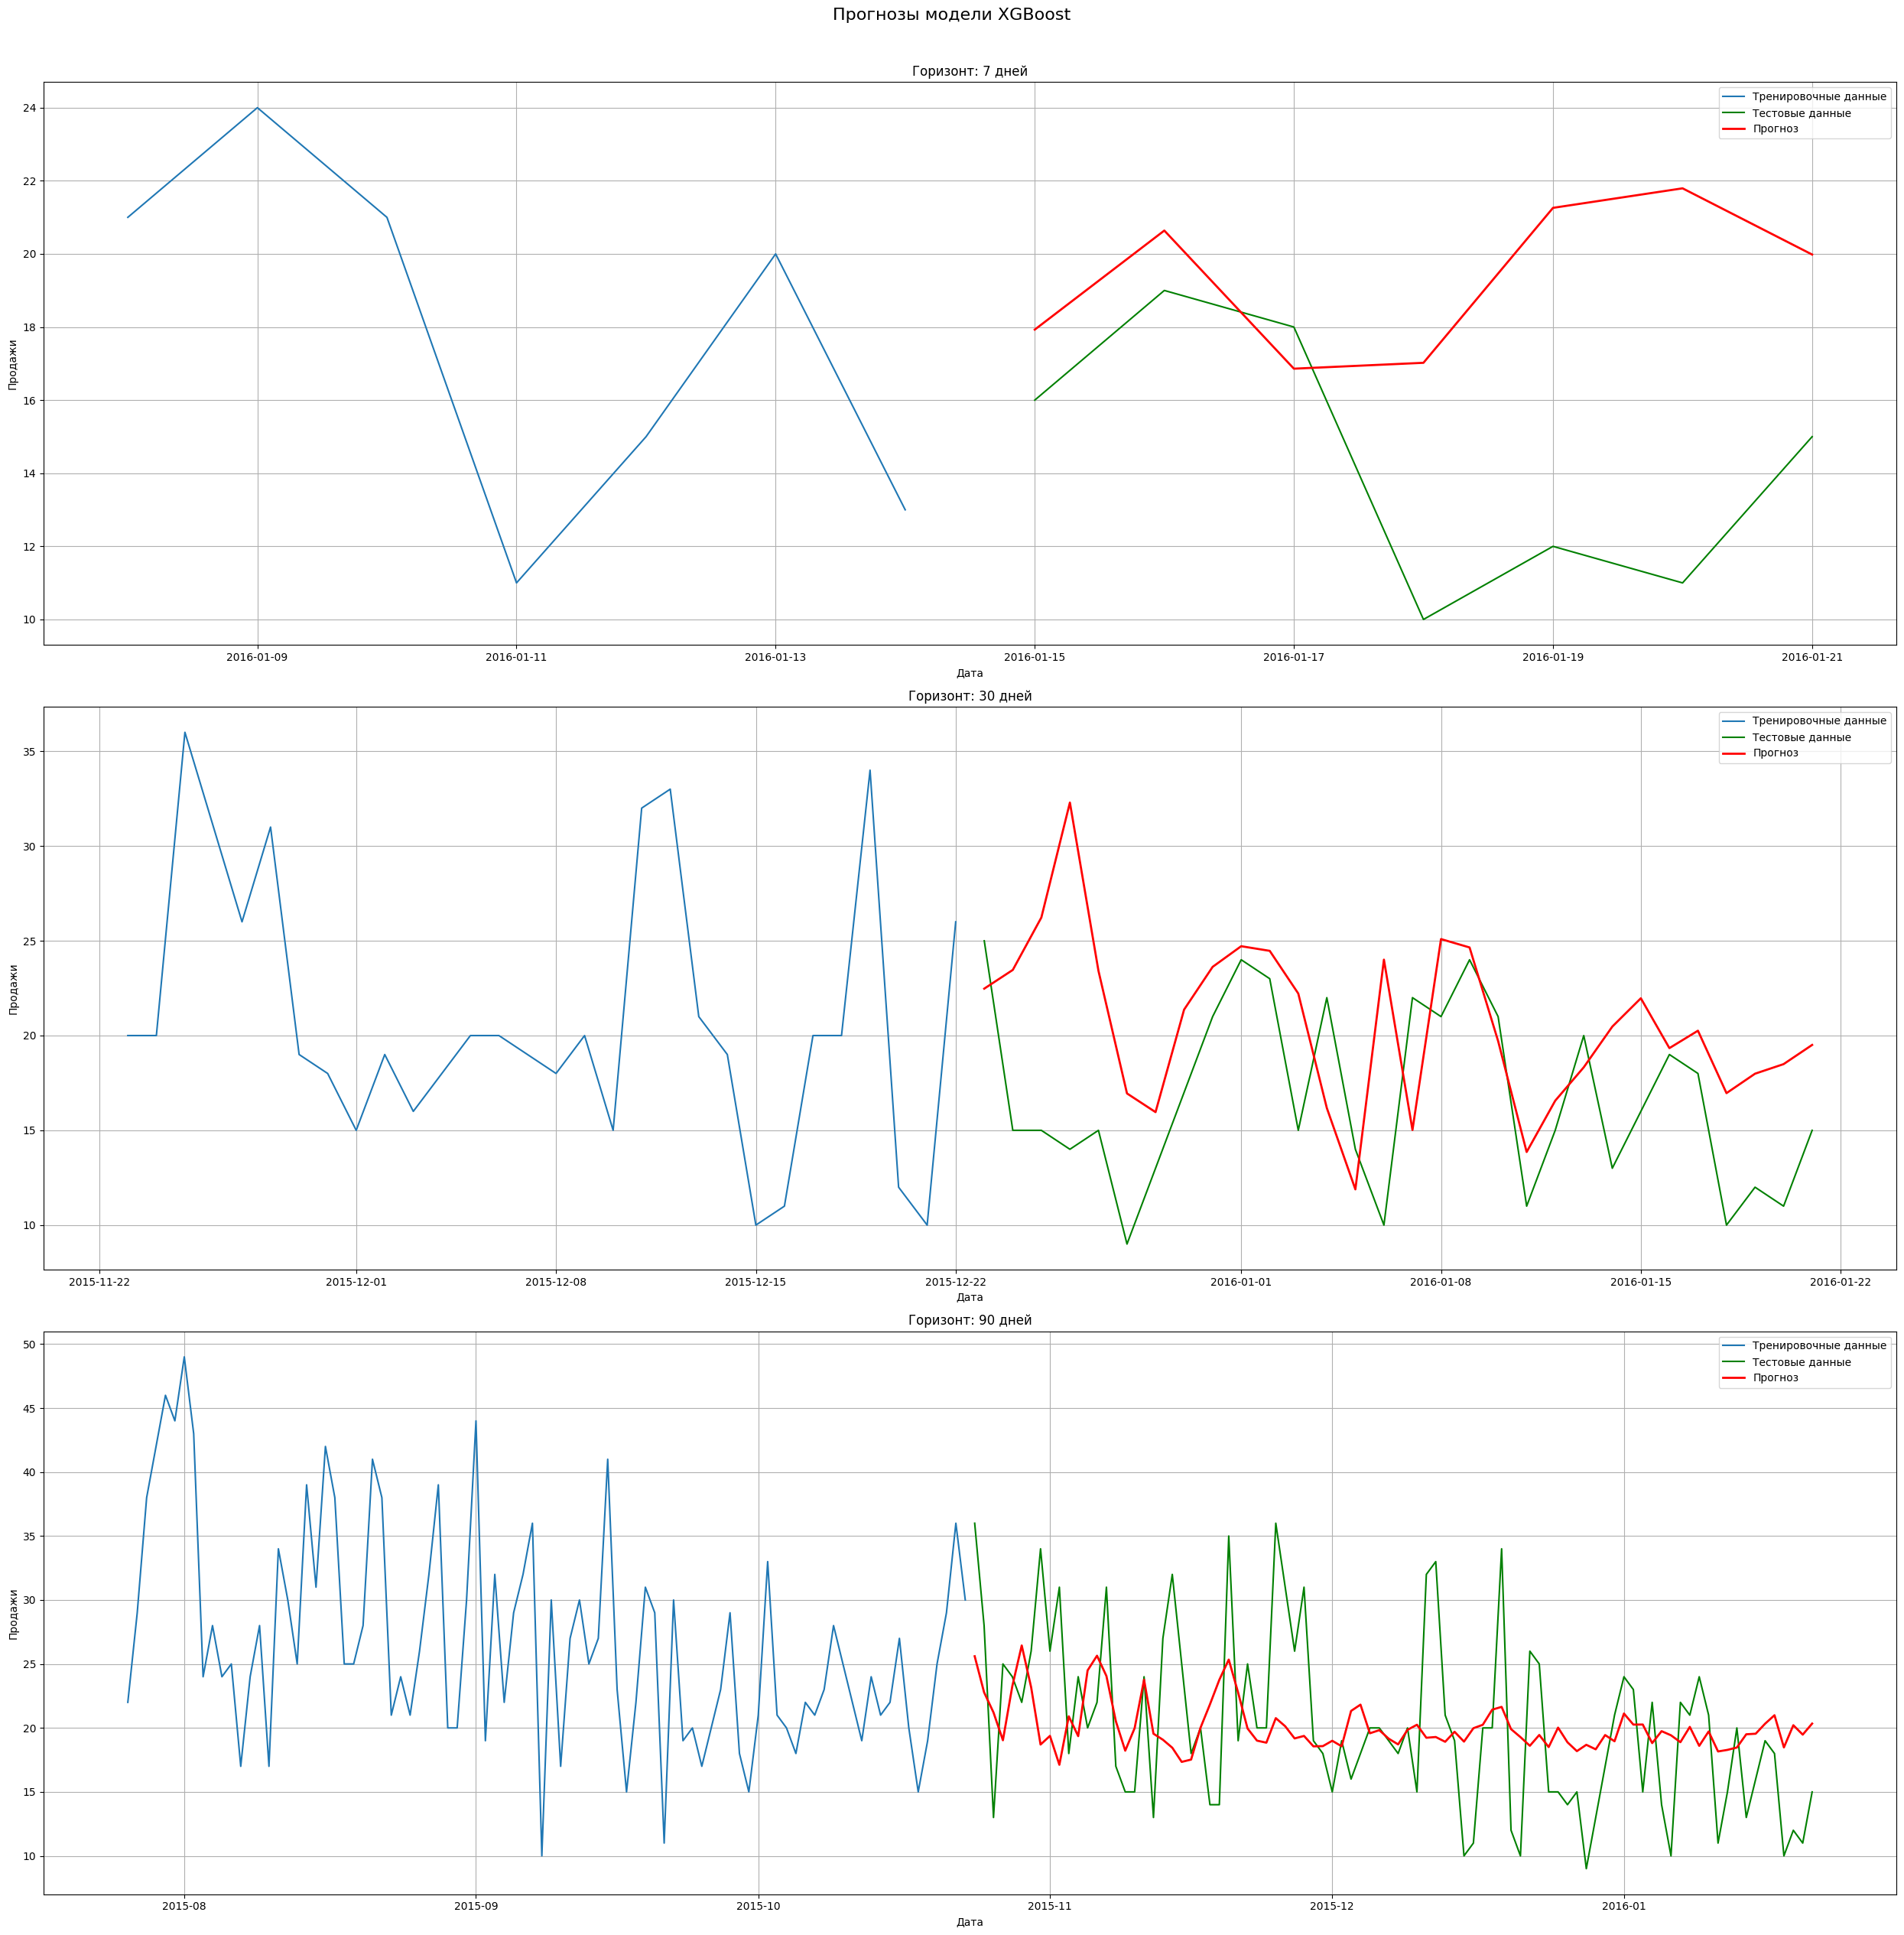

{('XGBoost', 7): {'MAE': 4.537705830165318,
                  'MAPE (%)': 34.956329926327946,
                  'RMSE': 5.632798161730458,
                  'SMAPE': 27.383549730543237},
 ('XGBoost', 30): {'MAE': 4.761761824289958,
                   'MAPE (%)': 31.739684311681337,
                   'RMSE': 6.137795849633712,
                   'SMAPE': 25.909403214030252},
 ('XGBoost', 90): {'MAE': 5.288449605305989,
                   'MAPE (%)': 26.101808049773588,
                   'RMSE': 6.637609931929802,
                   'SMAPE': 25.23369336064268}}
Product  STORE_1_727
{'trend': {'exists': True, 'p_value': 0.0006135321704071607, 'slope': 0.0005752813257752867}, 'seasonality': {'exists': False, 'period': 30, 'amplitude': 1.1402354048964218}, 'stationarity': {'ADF': {'p_value': 3.2229348878365226e-09, 'stationary': True}, 'KPSS': {'p_value': 0.1, 'stationary': True}}, 'outliers': {'count': 89, 'indices': [Timestamp('2011-08-21 00:00:00'), Timestamp('2011-09-04 00:00:00'), Ti

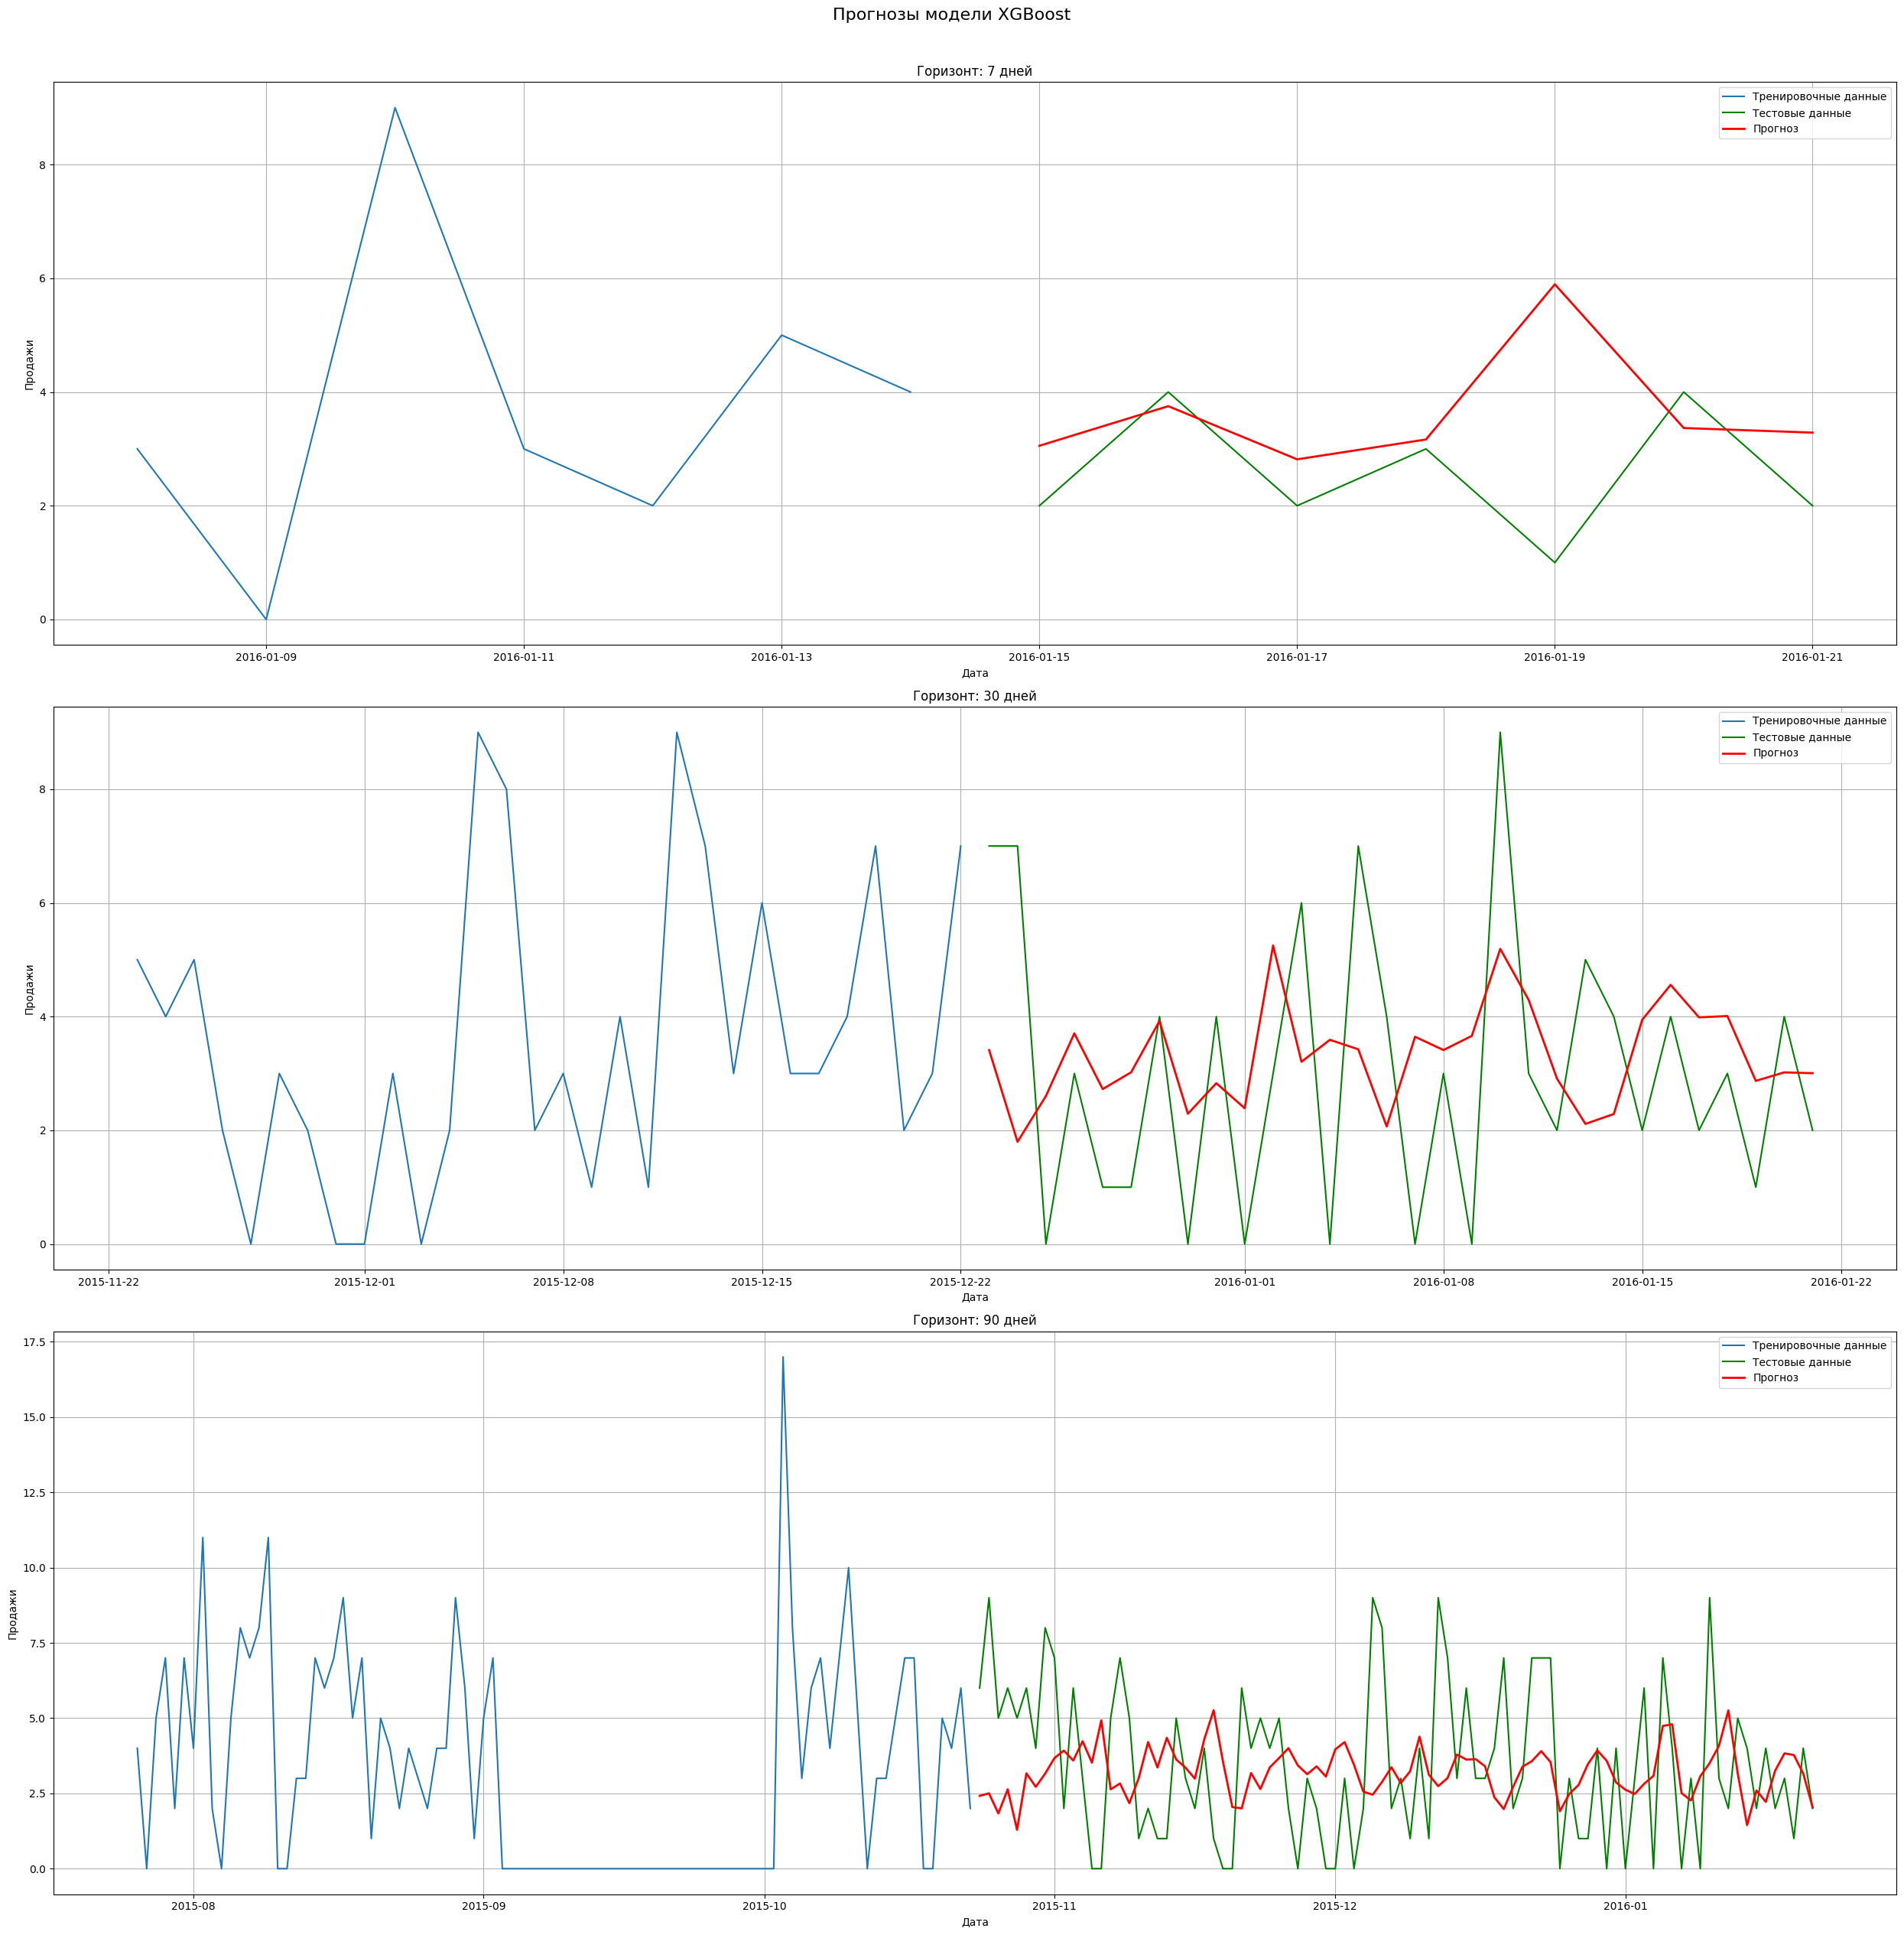

{('XGBoost', 7): {'MAE': 1.162294524056571,
                  'MAPE (%)': 41.52904646737235,
                  'RMSE': 1.6990565465771172,
                  'SMAPE': 29.541161253731858},
 ('XGBoost', 30): {'MAE': 1.947886308034261,
                   'MAPE (%)': 68.76767716615917,
                   'RMSE': 2.531729205119354,
                   'SMAPE': 54.3474642117437},
 ('XGBoost', 90): {'MAE': 2.4220402876536054,
                   'MAPE (%)': 72.09252671610952,
                   'RMSE': 3.058478340300865,
                   'SMAPE': 61.67745000027577}}


In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
for item in model.product_ids:
  model.full_analysis(item)

P.S. к предыдущему дз(не знаю где еще писать) - в комментариях было написано, что нет ответов на вопросы, но ответы на вопросы присутствовали в отчете. Может это было не прям в явном виде типа вопрос ответ. Но я описала классы и методы, сказала какие модели использовала и почему, какие метрики использовала и почему. Визуализация графиков и значения метрик также приводились в выводе модели.
## **Отчет**

### Описание реализованных классов и методов
**1. Класс `TimeSeriesProcessor`**  
Базовый класс для предобработки временных рядов:
- `remove_leading_zeros()`: Удаляет начальные нули в ряде, если их количество превышает 100 дней.
- `handle_outliers()`: Обнаруживает выбросы с помощью `IsolationForest` и заменяет их скользящей медианой.
- `inverse_transform()`: Выполняет обратное преобразование прогноза (например, после логарифмирования).
- `preprocess()`: Объединяет все этапы предобработки (удаление нулей, обработка выбросов, преобразование данных).

**2. Класс `TimeSeriesAnalysis`**  
Наследуется от `TimeSeriesProcessor` и выполняет анализ временных рядов:
- `run_analysis()`: Запускает полный анализ, включая:
  - Проверку тренда (линейная регрессия).
  - Анализ сезонности (сезонная декомпозиция, Фурье-спектр).
  - Тесты на стационарность (ADF, KPSS).
  - Обнаружение выбросов.
  - Визуализацию данных (графики ряда, спектров, распределение ошибок).
- Генерирует отчет в словаре `report`.

**3. Класс `TimeSeriesClass`**  
Наследуется от `TimeSeriesProcessor` и решает задачу прогнозирования:
- `get_item_series()`: Формирует временной ряд для конкретного товара
- `evaluate_models()`: Оценивает качество моделей на горизонтах 7, 30, 90 дней.
- `train_xgboost()`: Обучает XGBoost с использованием лаговых признаков.
- `remove_trend` + `restore_trend`: детрендирование ряда и восстановление, так как градиентный бустинг не умеет в экстраполяцию
- `calculate_metrics()`: Рассчитывает метрики MAE, MAPE, RMSE, SMAPE
- `full_analysis()`: Запускает полный анализ с прогнозированием для конкретного товара. Параметр `show_plots` отвечает за показ графиков анализа ряда (по умолчанию False)

**Пример работы методов**:
```python
processor = TimeSeriesProcessor()
cleaned_series = processor.preprocess(raw_series)  # Предобработка
analysis = TimeSeriesAnalysis()
report = analysis.run_analysis(cleaned_series)     # Анализ
forecaster = TimeSeriesClass(store, dates, prices)
forecaster.full_analysis("product_123")            # Прогнозирование
```

---

### Ответы на вопросы

**1. Какие методы предобработки данных вы использовали? Почему пробовали именно их?**  
Использованы:
- **Удаление начальных нулей** для исключения некорректных записей.
- **Изоляция выбросов через IsolationForest** с заменой на скользящую медиану (устойчив к аномалиям).
- **Сдвиг на 1 и обрезание отрицательных значений** для стабилизации дисперсии.  
Эти методы устраняют артефакты данных и снижают влияние шумов на модель.

---

**2. Какие модели пробовали? Почему пробовали именно их?**  
1. **ARIMA/SARIMA(прошлое задание)**  
   - **Причина выбора**: Классические модели для стационарных рядов с сезонностью.  
   - **Результаты**: Хорошая интерпретируемость, но низкая точность на рядах с нелинейными зависимостями. Требовалась ручная настройка параметров `(p, d, q)(P, D, Q, s)`.

2. **Prophet**  
   - **Причина выбора**: Автоматическое определение тренда и сезонности.  
   - **Результаты**: Эффективен на данных с явными сезонными паттернами, но плохо адаптируется к аномалиям и шумам.

3. **LSTM**  
   - **Причина выбора**: Улавливает сложные временные зависимости.  
   - **Результаты**: Требовал большого объема данных для обучения.Время обучения в 3–5 раз выше, чем у XGBoost.

4. **Transformer**  
   - **Причина выбора**: Потенциально лучшее качество на длинных последовательностях.  
   - **Результаты**: Избыточная сложность для рядов с ежедневной частотой. Неоправданные вычислительные затраты.

5. **XGBoost(с редукционным подходом) - выбран в этом задании**  
   - **Причина выбора**:  
     - Работает с нелинейными зависимостями и пропусками в данных.  
     - Автоматический учет лаговых признаков через `window_length`.  
     - Рекуррентная стратегия (`strategy="recursive"`) позволяет прогнозировать многократные горизонты.
     - Быстрое обучение и возможность интерпретации (feature importance).  
   - **Результаты**: Лучший баланс точности и скорости. Среднее улучшение RMSE на 15–20% по сравнению с классическими моделями

**Почему выбран XGBoost?**  
- **Интерпретируемость**: Возможность анализа важности лаговых признаков.  
- **Скорость**: Обучение за 5–10 сек. на CPU vs 1–2 мин. для LSTM на GPU.  
- **Устойчивость к шумам**: Деревья менее чувствительны к выбросам, чем нейросети.  
- **Гибкость**: Легко адаптируется к разным горизонтам прогнозирования (7/30/90 дней).

---

**3. Как вы проверяете качество модели? На каких данных? Какие метрики используете? Чем обусловлен выбор именно этих метрик?**  
- **Данные**: Берем тестовый набор — последние `horizon` точек ряда (7/30/90 дней).
- **Метрики**:
  - **MAE** — средняя абсолютная ошибка.
  - **MAPE** — относительная ошибка в процентах.
  - **RMSE** — чувствительность к крупным ошибкам.  
  - **SMAPE** — устраняет асимметрию: не штрафует за прогнозы ниже истинных значений сильнее, чем за завышенные + Устойчив к нулевым значениям (в отличие от MAPE, где деление на ноль невозможно).
---

**4. Какой подход из испробованных самый оптимальный с точки зрения качества прогнозирования?**  
- **XGBoost** показал лучшую сбалансированность между точностью и скоростью обучения. Результаты улучшаются за счет:
  - Автоматического учета тренда и сезонности через лаговые признаки.
  - Настройки гиперпараметров (`n_estimators=500`, `max_depth=5`).
- XGBoost обеспечивает лучшее качество при минимальных вычислительных затратах. Нейросети (LSTM, Transformer) не показали значимого улучшения, чтобы оправдать их использование.
---

**5. Какое итоговое качество модели на тестовом датасете?**  
- для каждого продукта после графика выводим сразу и метрики в отчете выше
- Например для продукта Product  STORE_1_727
  - horizon - 7:
    - 'MAE':      1.162294524056571
    - 'MAPE (%)': 41.52904646737235
    - 'RMSE':     1.6990565465771172
    - 'SMAPE':    29.541161253731858
  - horizon - 30:
    - 'MAE': 1.947886308034261
    - 'MAPE (%)': 68.76767716615917
    - 'RMSE': 2.531729205119354
    - 'SMAPE': 54.347464211743
  - horizon - 90:
    - 'MAE': 2.4220402876536054
    - 'MAPE (%)': 72.09252671610952
    - 'RMSE': 3.058478340300865
    - 'SMAPE': 61.67745000027577